# Deep Reinforcement Learning for Adaptive Control of Heater Position and Heating Power in a Smart Greenhouse

---
Copyright Statement:

Author: Ratta Chindasilpa
Author's email: raththar@hotmail.com

This code is part of the master's thesis of Ratta Chindasilpa, "Deep Reinforcement Learning for Adaptive Control of Heater Position and Heating Power in a Smart Greenhouse," developed at Wageningen University and Research.

---

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DRL performance
* Reward vs Epoch

## PPO 4 heaters and 400 episodes

In [2]:
# Read data from Excel
reward_epoch_4h = pd.read_excel("datasets/epoch_reward.xlsx", sheet_name="4_heaters")

reward_epoch_4h.info()
reward_epoch_4h.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         400 non-null    int64  
 1   reward_rep1   400 non-null    float64
 2   reward_rep2   400 non-null    float64
 3   reward_rep3   400 non-null    float64
 4   reward_rep4   400 non-null    float64
 5   reward_rep5   400 non-null    float64
 6   reward_rep6   400 non-null    float64
 7   reward_rep7   400 non-null    float64
 8   reward_rep8   400 non-null    float64
 9   reward_rep9   400 non-null    float64
 10  reward_rep10  400 non-null    float64
 11  length        400 non-null    int64  
 12  time          400 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.8 KB


epoch  reward_rep1  reward_rep2  reward_rep3  reward_rep4  reward_rep5  \
0      1    15.446854    15.296854    30.776854    20.386854    28.836854   
1      2    18.546150    32.116150    16.086150    31.136150    31.066150   
2      3    32.822905    32.932905    21.832905    24.762905    30.082905   
3      4    43.176815    25.886815    35.166815    26.936815    36.086815   
4      5    44.224744    57.244744    30.314744    26.754744    31.404744   

   reward_rep6  reward_rep7  reward_rep8  reward_rep9  reward_rep10  length  \
0     3.366854    34.336854    32.796854    33.226854     -3.833146     115   
1    26.516150    35.366150    31.266150    36.376150      4.616150     115   
2    42.252905    16.432905    28.272905    17.762905     18.052905     115   
3    40.346815    45.966815    58.136815    51.536815     59.816815     115   
4    32.824744    38.964744    37.194744    28.324744     64.194744     115   

          time  
0   248.013682  
1   496.788738  
2   745.237664  
3   994.500380  
4  1240.257561

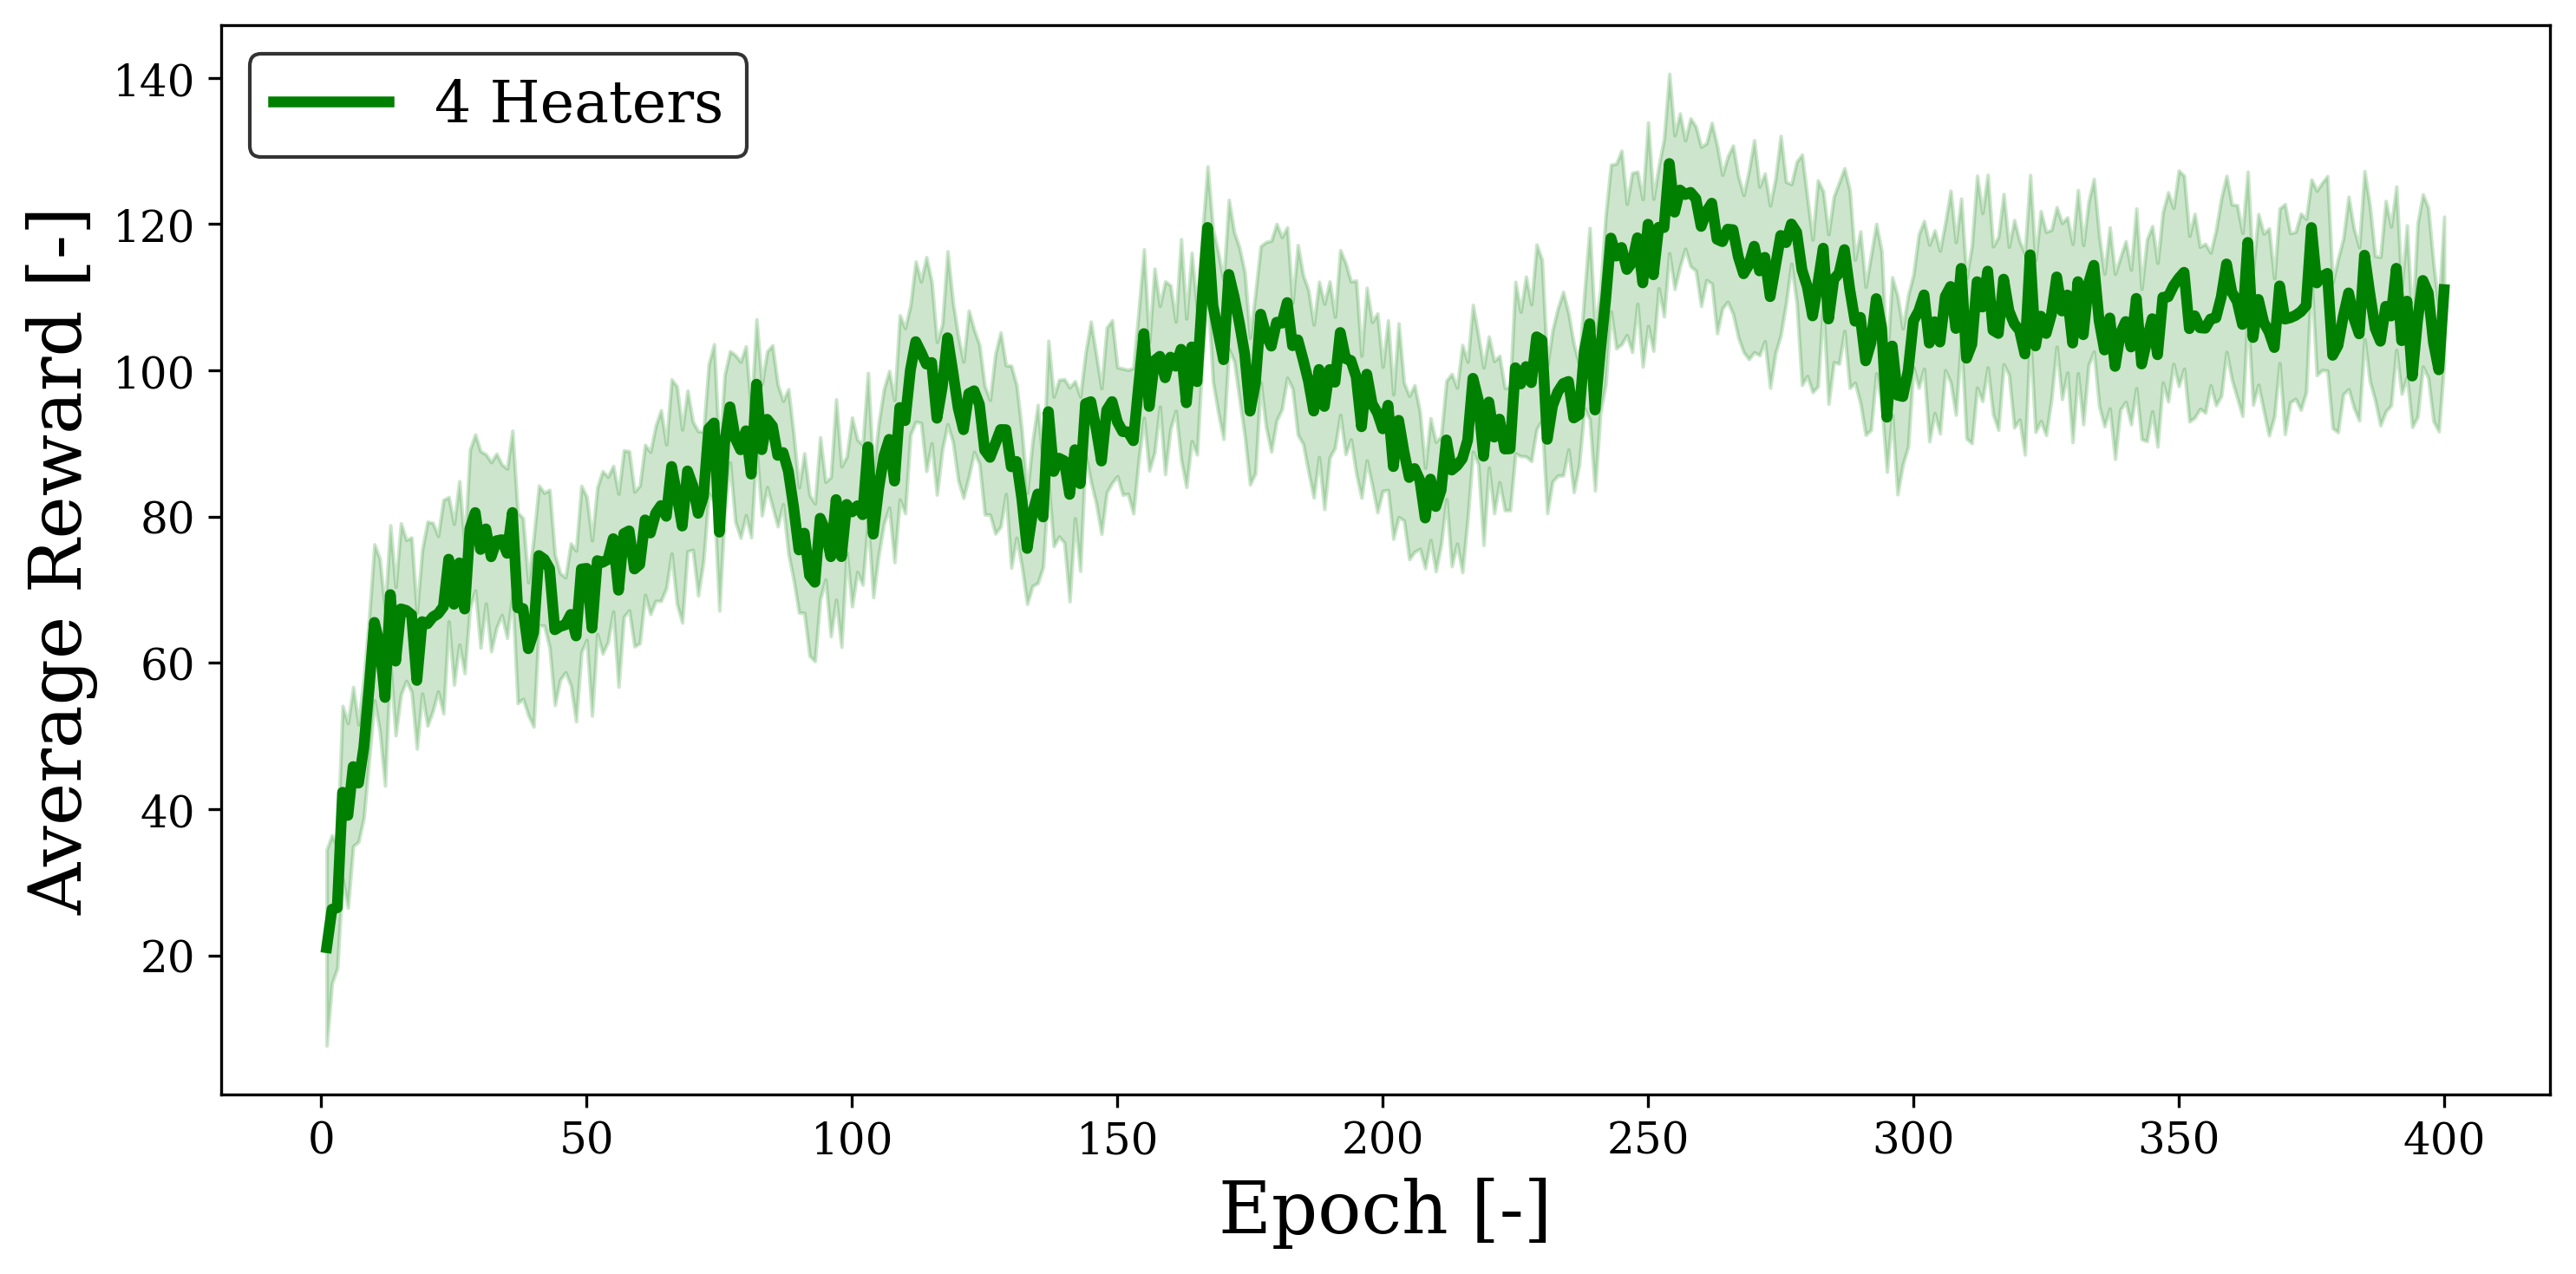

In [3]:
# Extract the epoch values
epochs_4h = reward_epoch_4h['epoch']

# Extract the reward columns (10 runs)
reward_runs_4h = reward_epoch_4h[['reward_rep1', 
                                  'reward_rep2', 
                                  'reward_rep3', 
                                  'reward_rep4', 
                                  'reward_rep5', 
                                  'reward_rep6', 
                                  'reward_rep7', 
                                  'reward_rep8', 
                                  'reward_rep9', 
                                  'reward_rep10']]

# Calculate the mean and standard deviation across the 10 runs
mean_reward_4h = reward_runs_4h.mean(axis=1)
std_reward_4h = reward_runs_4h.std(axis=1)

# Plot the results
# Set up font rendering and style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot the mean reward
ax.plot(epochs_4h, 
        mean_reward_4h, 
        # marker="o", 
        # linestyle="-", 
        color="green", 
        label="4 Heaters",
        linewidth=3
        )

# Fill the region mean ± std
ax.fill_between(epochs_4h,
                mean_reward_4h - std_reward_4h,
                mean_reward_4h + std_reward_4h,
                color="green",
                alpha=0.2)

ax.set_xlabel("Epoch [-]", fontsize=20)
ax.set_ylabel("Average Reward [-]", fontsize=20)
ax.tick_params(axis='both', labelsize=12)
# ax.set_title("Reward vs. Epoch (with Standard Deviation)", 
#              fontsize=14, 
#              fontweight='bold')
ax.legend(fontsize=16, edgecolor='black', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## PPO 6 heaters and 400 episodes

In [4]:
# Read data from Excel
reward_epoch_6h = pd.read_excel("datasets/epoch_reward.xlsx", sheet_name="6_heaters")

reward_epoch_6h.info()
reward_epoch_6h.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         400 non-null    int64  
 1   reward_rep1   400 non-null    float64
 2   reward_rep2   400 non-null    float64
 3   reward_rep3   400 non-null    float64
 4   reward_rep4   400 non-null    float64
 5   reward_rep5   400 non-null    float64
 6   reward_rep6   400 non-null    float64
 7   reward_rep7   400 non-null    float64
 8   reward_rep8   400 non-null    float64
 9   reward_rep9   400 non-null    float64
 10  reward_rep10  400 non-null    float64
 11  length        400 non-null    int64  
 12  time          400 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.8 KB


epoch  reward_rep1  reward_rep2  reward_rep3  reward_rep4  reward_rep5  \
0      1    22.980262    35.670262    28.590262    33.330262     4.530262   
1      2    25.338701    39.408701     6.278701    42.028701    42.618701   
2      3    27.834628    44.744628    21.154628    46.614628    25.004628   
3      4    30.153214    41.693214    20.433214    31.483214    26.203214   
4      5    35.768787    51.948787    34.358787    25.738787    18.758787   

   reward_rep6  reward_rep7  reward_rep8  reward_rep9  reward_rep10  length  \
0    10.530262    23.990262    42.450262     8.360262     32.710262     115   
1    11.618701    18.028701    37.608701    41.908701     14.788701     115   
2    21.094628    32.774628    16.534628    39.124628     27.224628     115   
3    45.103214    34.093214    30.703214    27.643214     33.913214     115   
4    32.358787    27.888787    17.238787    36.968787     39.768787     115   

          time  
0   317.406916  
1   629.590367  
2   937.742949  
3  1249.221267  
4  1562.796143

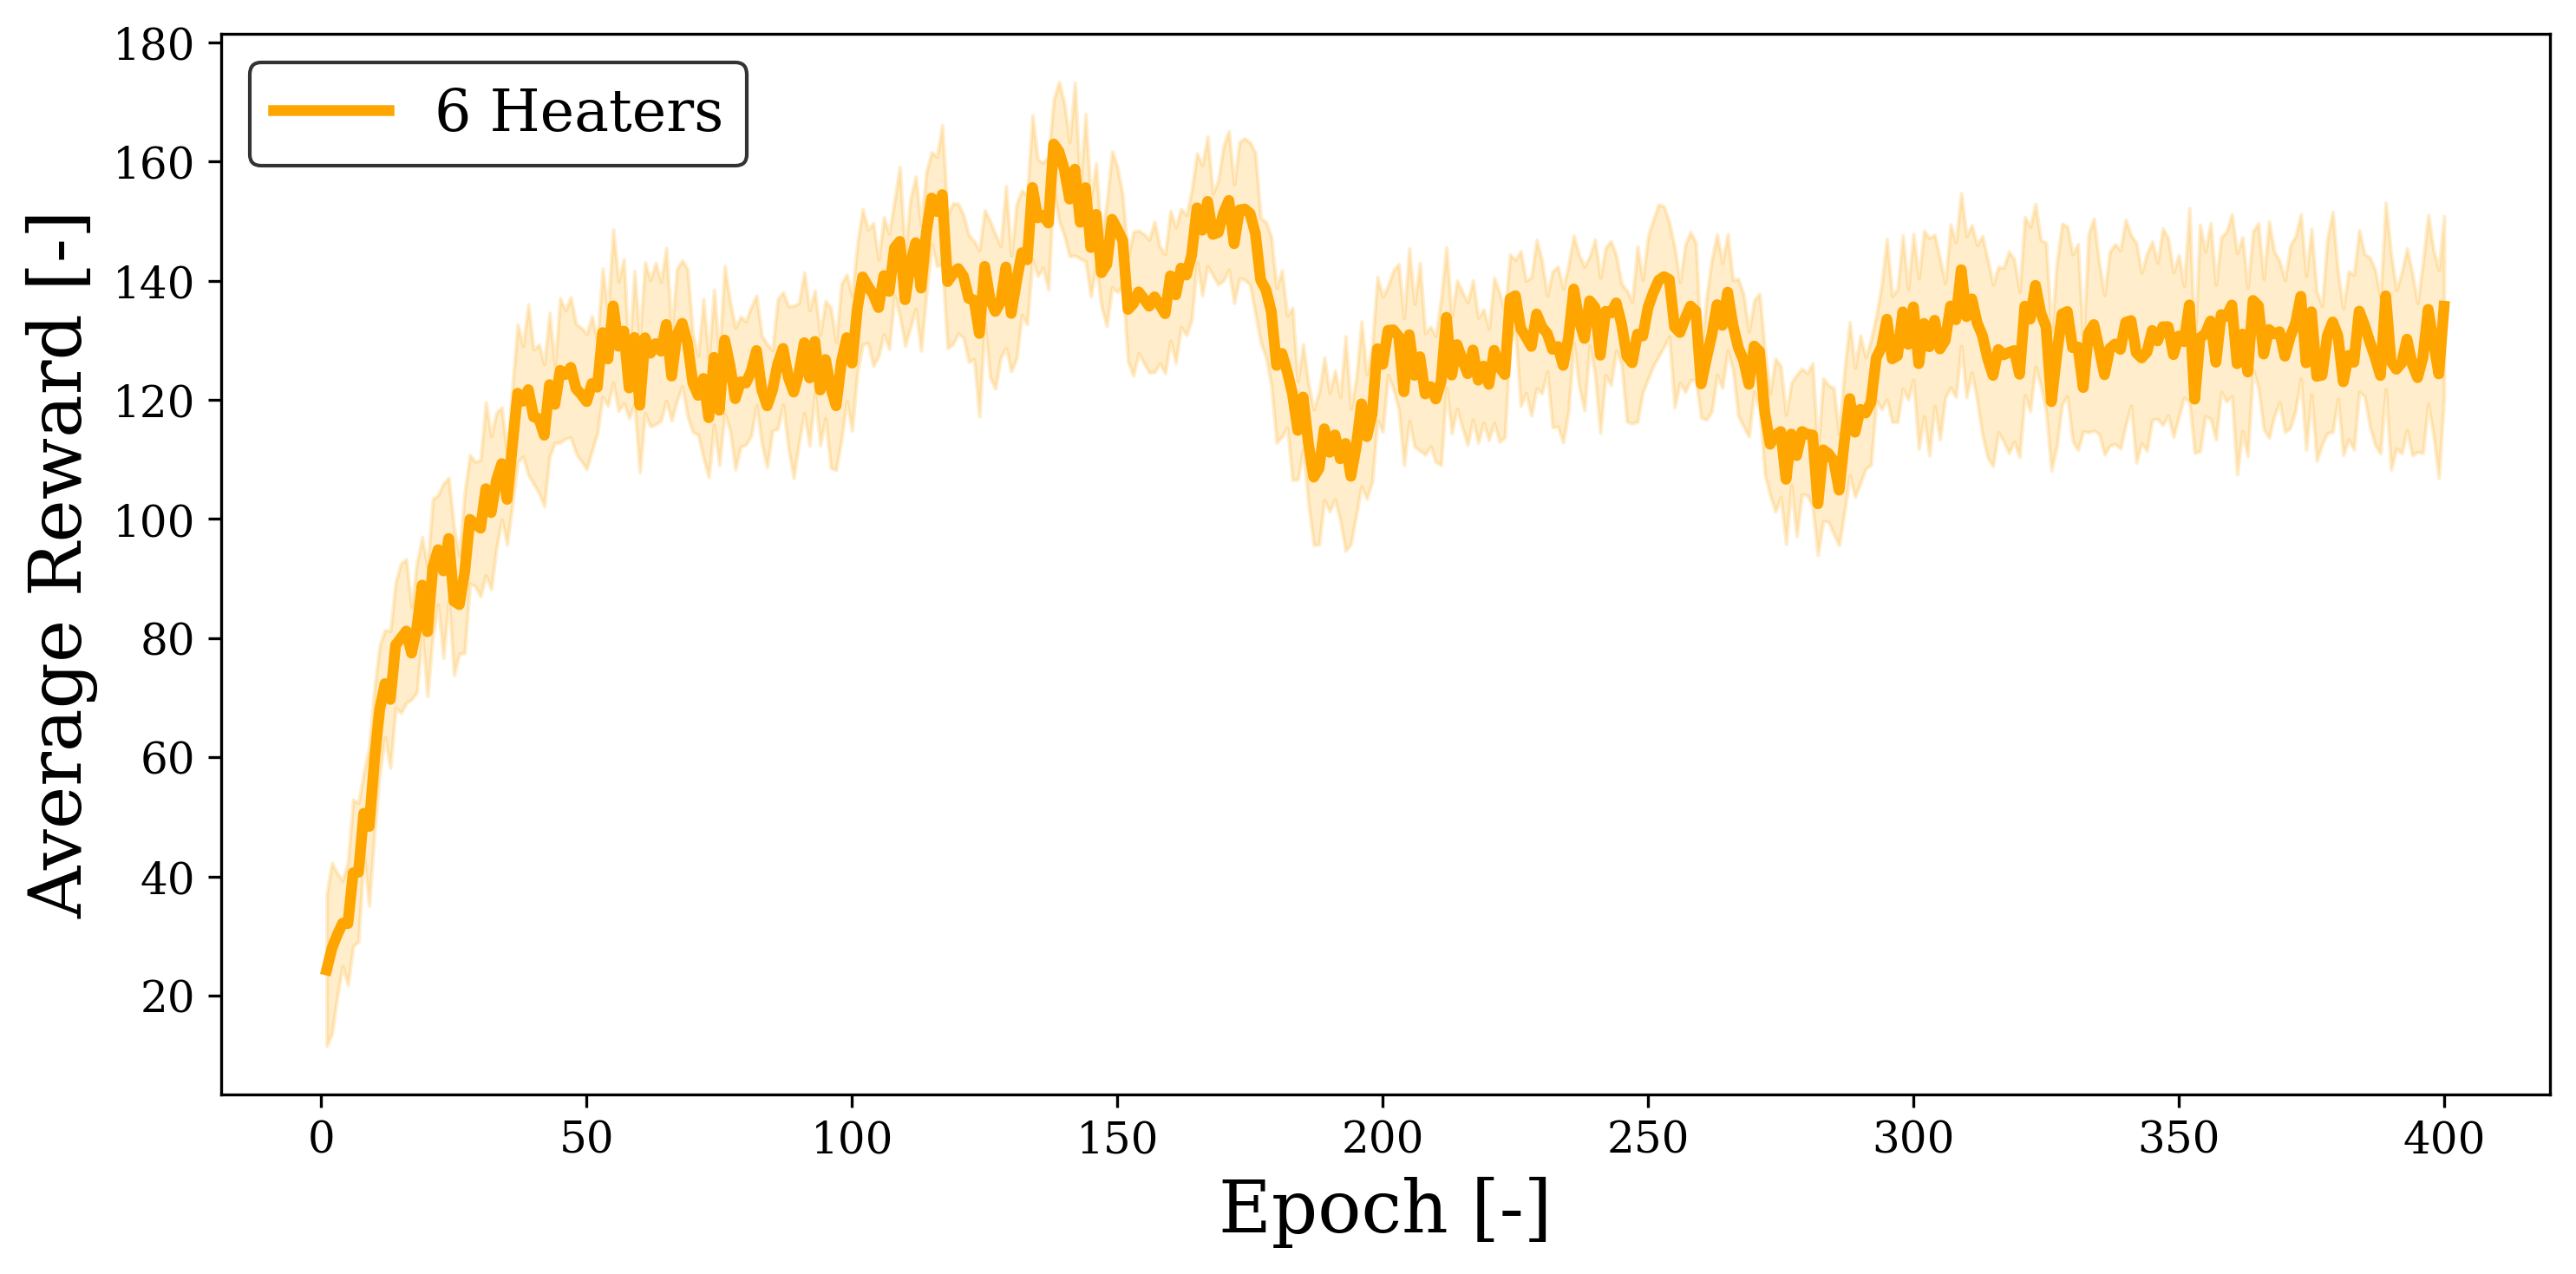

In [5]:
# Extract the epoch values
epochs_6h = reward_epoch_6h['epoch']

# Extract the reward columns (10 runs)
reward_runs_6h = reward_epoch_6h[['reward_rep1', 
                                  'reward_rep2', 
                                  'reward_rep3', 
                                  'reward_rep4', 
                                  'reward_rep5', 
                                  'reward_rep6', 
                                  'reward_rep7', 
                                  'reward_rep8', 
                                  'reward_rep9', 
                                  'reward_rep10']]

# Calculate the mean and standard deviation across the 10 runs
mean_reward_6h = reward_runs_6h.mean(axis=1)
std_reward_6h = reward_runs_6h.std(axis=1)

# Plot the results
# Set up font rendering and style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot the mean reward
ax.plot(epochs_6h, 
        mean_reward_6h, 
        # marker="o", 
        # linestyle="-", 
        color="orange", 
        label="6 Heaters",
        linewidth=3
        )

# Fill the region mean ± std
ax.fill_between(epochs_6h,
                mean_reward_6h - std_reward_6h,
                mean_reward_6h + std_reward_6h,
                color="orange",
                alpha=0.2)

ax.set_xlabel("Epoch [-]", fontsize=20)
ax.set_ylabel("Average Reward [-]", fontsize=20)
ax.tick_params(axis='both', labelsize=12)
# ax.set_title("Reward vs. Epoch (with Standard Deviation)", 
#              fontsize=14, 
#              fontweight='bold')
ax.legend(fontsize=16, edgecolor='black', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## PPO 8 heaters and 400 episodes

In [6]:
# Read data from Excel
reward_epoch_8h = pd.read_excel("datasets/epoch_reward.xlsx", sheet_name="8_heaters")

reward_epoch_8h.info()
reward_epoch_8h.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         400 non-null    int64  
 1   reward_rep1   400 non-null    float64
 2   reward_rep2   400 non-null    float64
 3   reward_rep3   400 non-null    float64
 4   reward_rep4   400 non-null    float64
 5   reward_rep5   400 non-null    float64
 6   reward_rep6   400 non-null    float64
 7   reward_rep7   400 non-null    float64
 8   reward_rep8   400 non-null    float64
 9   reward_rep9   400 non-null    float64
 10  reward_rep10  400 non-null    float64
 11  length        400 non-null    int64  
 12  time          400 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.8 KB


epoch  reward_rep1  reward_rep2  reward_rep3  reward_rep4  reward_rep5  \
0      1    26.396669    22.946669    34.026669    40.626669    18.276669   
1      2    30.894113    50.214113    49.624113    45.644113    29.394113   
2      3    37.946462    42.876462    21.026462    48.146462    36.866462   
3      4    42.377835    23.897835    37.867835    30.147835    58.397835   
4      5    51.757972    49.107972    34.637972    70.247972    53.837972   

   reward_rep6  reward_rep7  reward_rep8  reward_rep9  reward_rep10  length  \
0    30.016669    30.896669    19.456669    32.346669     45.686669     115   
1    36.344113    20.564113    17.944113    46.234113     12.434113     115   
2    19.996462    38.166462    47.996462    36.916462     38.096462     115   
3    37.277835    50.247835    36.577835    39.717835     23.057835     115   
4    54.887972    37.087972    39.057972    34.027972     33.007972     115   

          time  
0   374.740335  
1   749.994644  
2  1123.082342  
3  1492.222747  
4  1864.026286

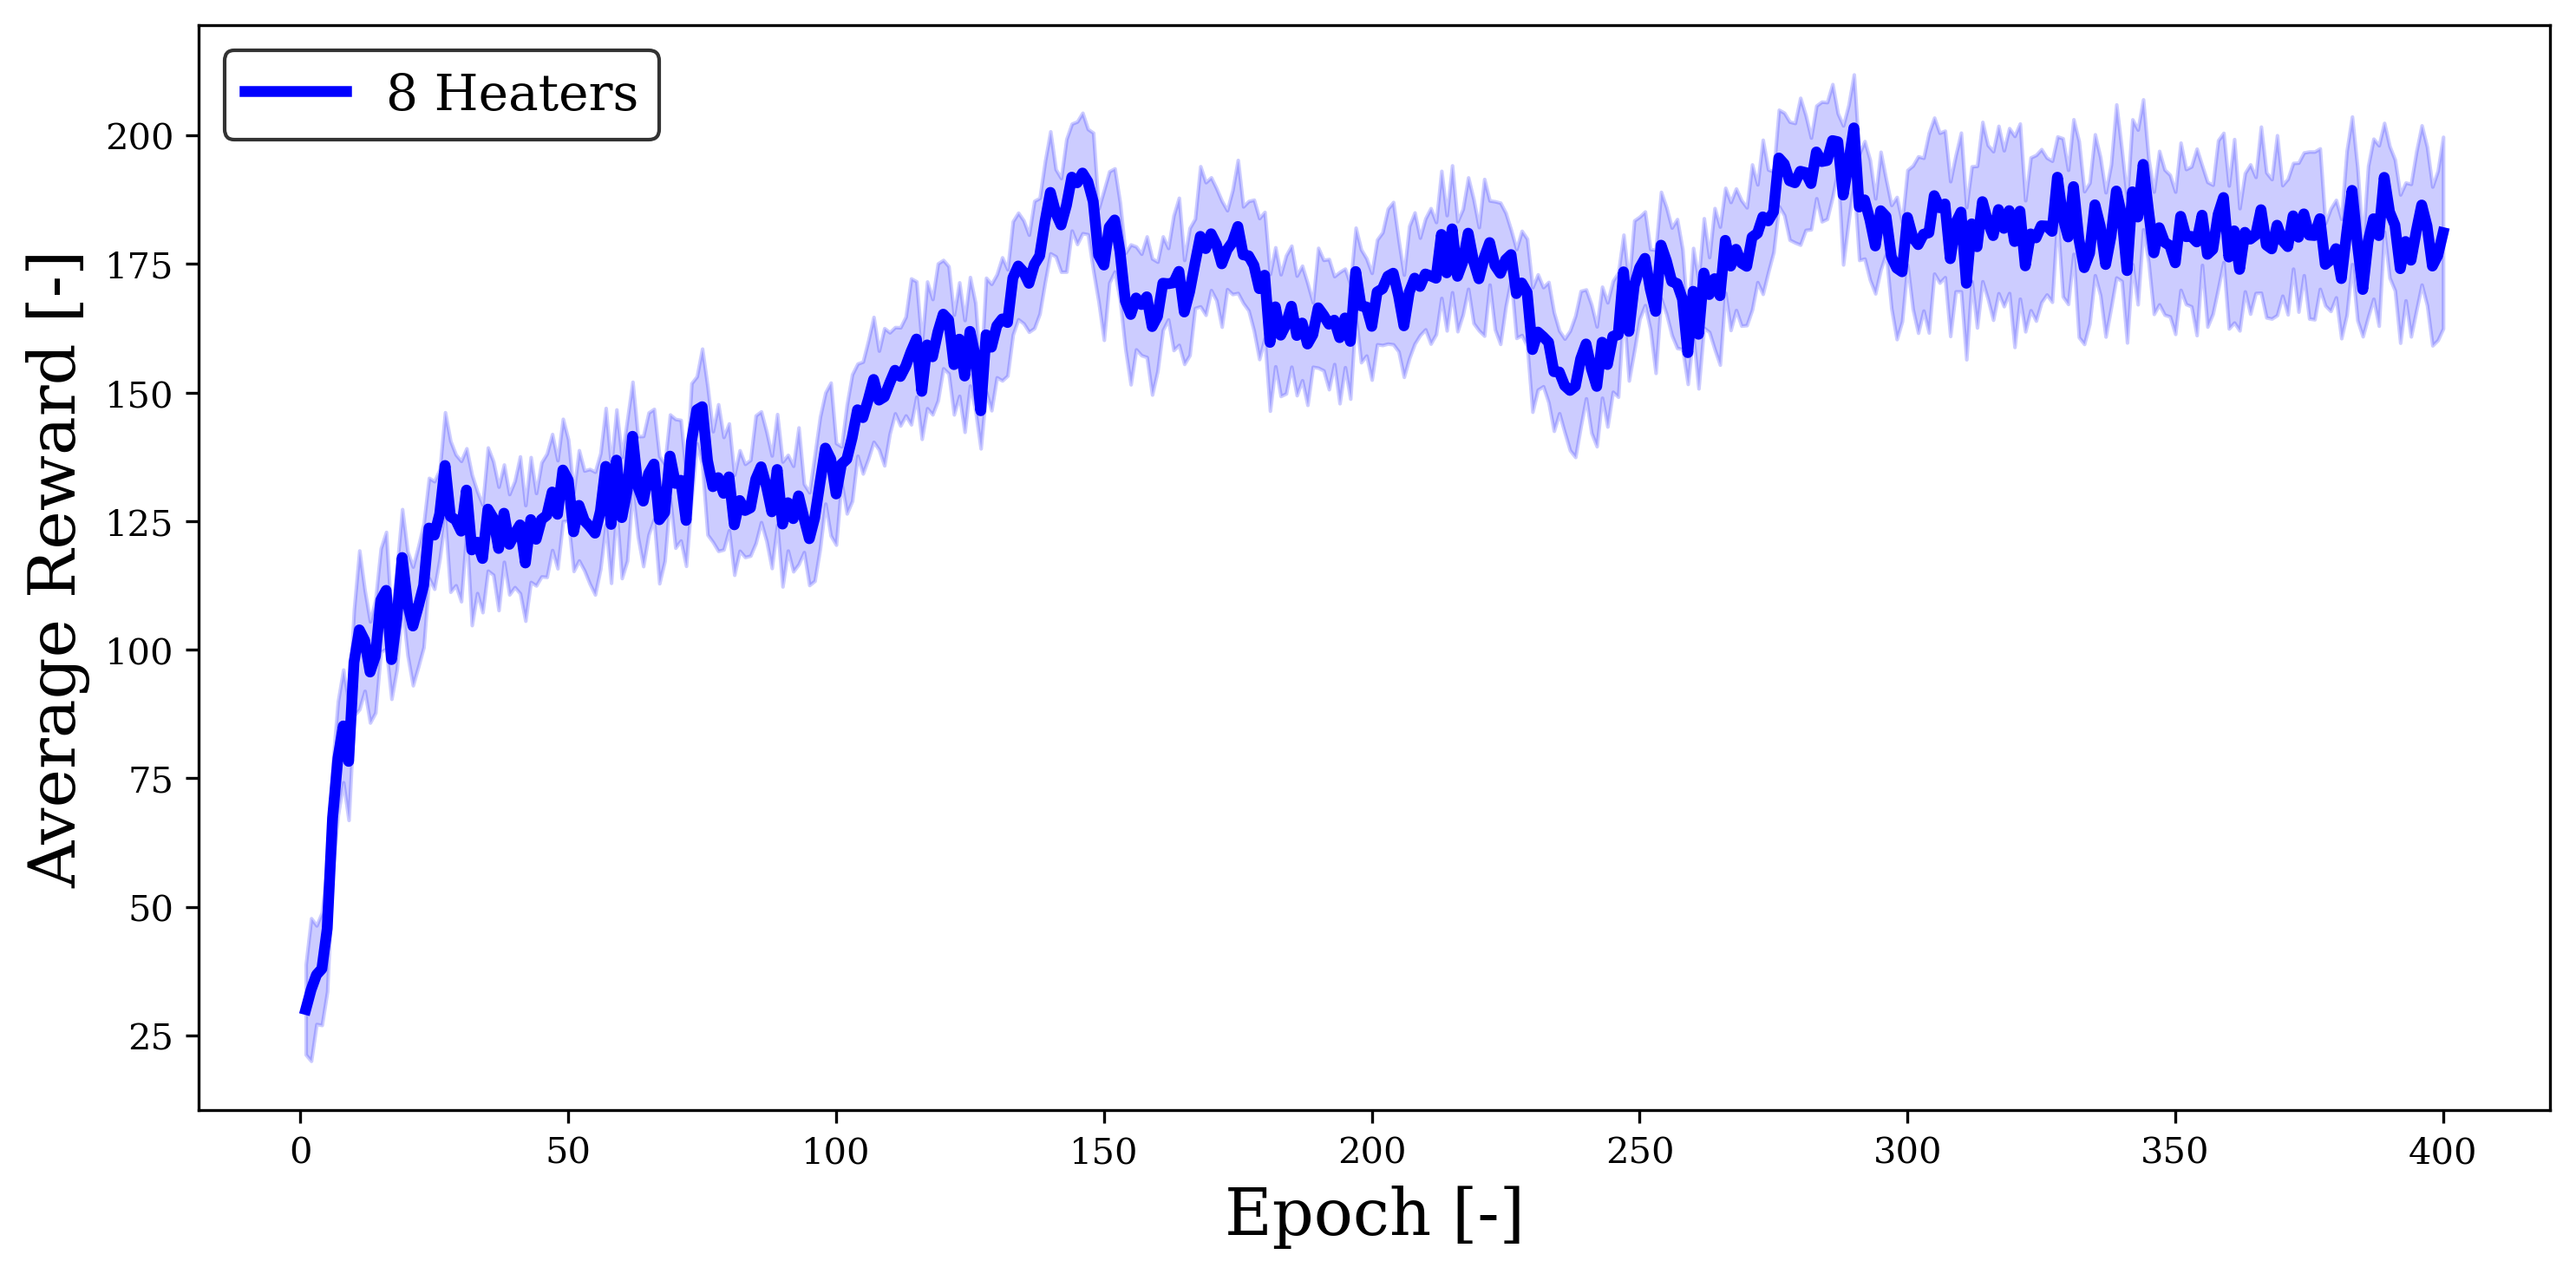

In [7]:
# Extract the epoch values
epochs_8h = reward_epoch_8h['epoch']
# Extract the reward columns (10 runs)
reward_runs_8h = reward_epoch_8h[['reward_rep1', 
                                  'reward_rep2', 
                                  'reward_rep3', 
                                  'reward_rep4', 
                                  'reward_rep5', 
                                  'reward_rep6', 
                                  'reward_rep7', 
                                  'reward_rep8', 
                                  'reward_rep9', 
                                  'reward_rep10']]
# Calculate the mean and standard deviation across the 10 runs
mean_reward_8h = reward_runs_8h.mean(axis=1)
std_reward_8h = reward_runs_8h.std(axis=1)

# Plot the results
# Set up font rendering and style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot the mean reward
ax.plot(epochs_8h, 
        mean_reward_8h, 
        # marker="o", 
        # linestyle="-", 
        color="blue", 
        label="8 Heaters",
        linewidth=3
        )

# Fill the region mean ± std
ax.fill_between(epochs_8h,
                mean_reward_8h - std_reward_8h,
                mean_reward_8h + std_reward_8h,
                color="blue",
                alpha=0.2)

ax.set_xlabel("Epoch [-]", fontsize=18)
ax.set_ylabel("Average Reward [-]", fontsize=18)
ax.tick_params(axis='both', labelsize=10)
# ax.set_title("Reward vs. Epoch (with Standard Deviation)", 
#              fontsize=14, 
#              fontweight='bold')
ax.legend(fontsize=14, edgecolor='black', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## Comparison DRL performance

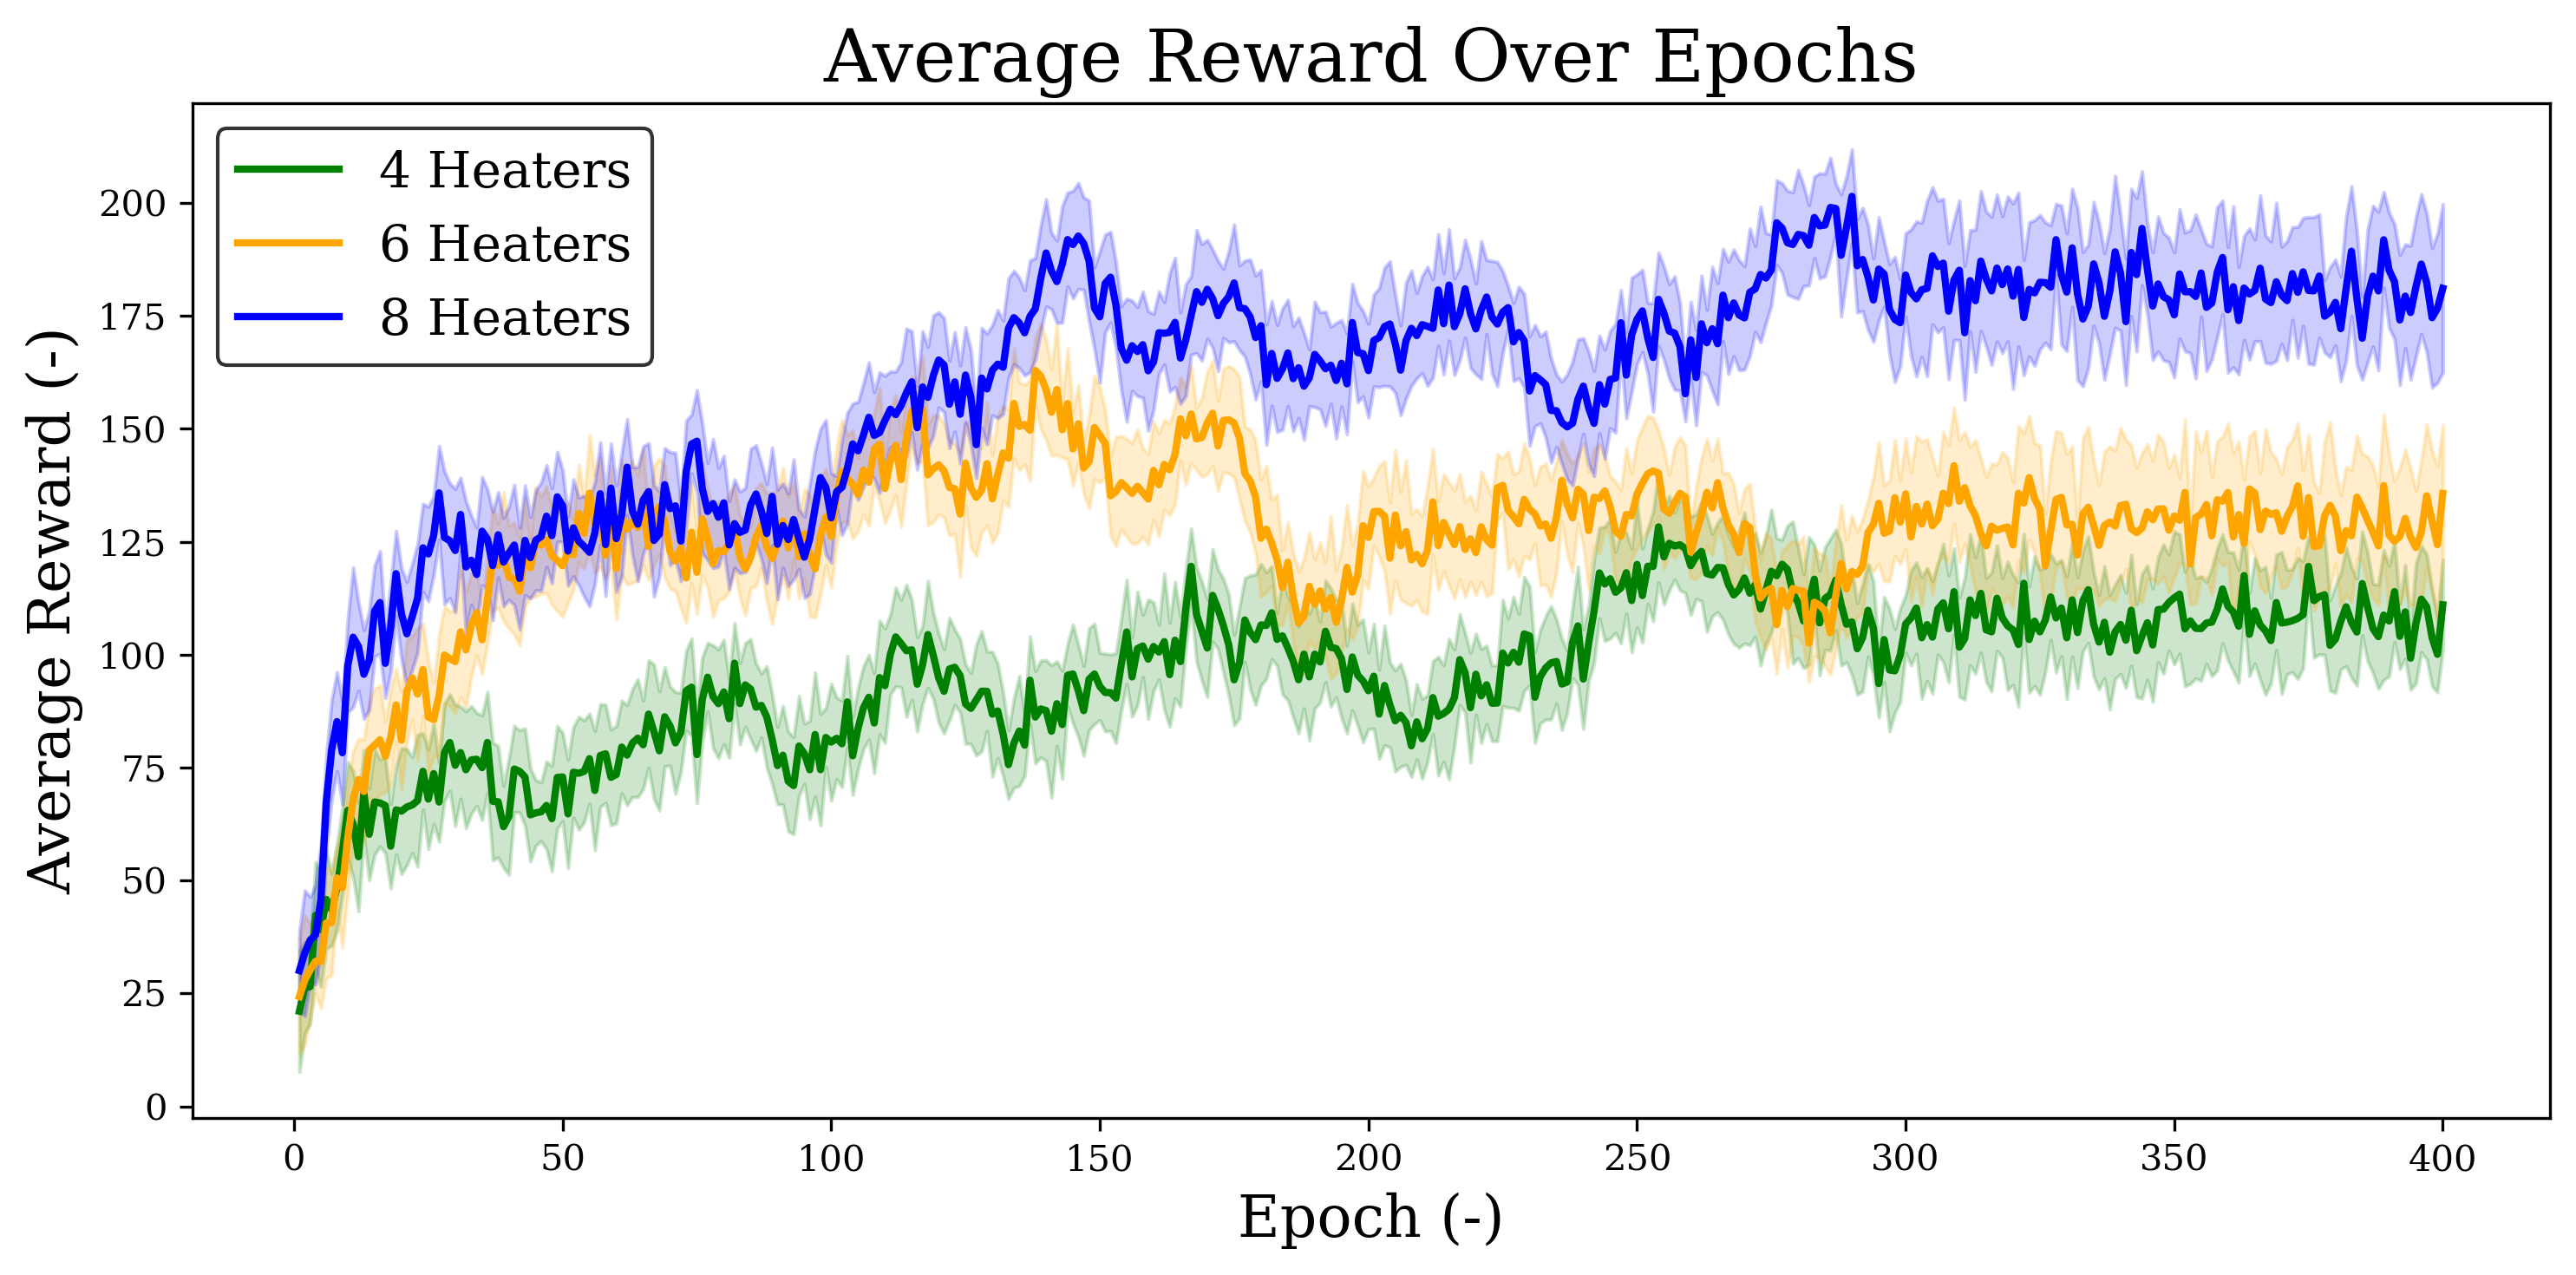

In [8]:
# Set up font rendering and style
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot 4 heaters data
ax.plot(epochs_4h, 
        mean_reward_4h, 
        color="green", 
        label="4 Heaters", 
        linewidth=2,
        linestyle="-"
        )

ax.fill_between(epochs_4h, 
                mean_reward_4h - std_reward_4h, 
                mean_reward_4h + std_reward_4h, 
                color="green", 
                alpha=0.2
                )

# Plot 6 heaters data
ax.plot(epochs_6h, 
        mean_reward_6h, 
        color="orange", 
        label="6 Heaters", 
        linewidth=2,
        linestyle="-"
        )

ax.fill_between(epochs_6h, 
                mean_reward_6h - std_reward_6h, 
                mean_reward_6h + std_reward_6h, 
                color="orange", 
                alpha=0.2
                )

# Plot 8 heaters data
ax.plot(epochs_8h, 
        mean_reward_8h, 
        color="blue", 
        label="8 Heaters", 
        linewidth=2,
        linestyle="-"
        )

ax.fill_between(epochs_8h, 
                mean_reward_8h - std_reward_8h, 
                mean_reward_8h + std_reward_8h, 
                color="blue", 
                alpha=0.2
                )

# Set labels and legend
# ax.set_title("Average Reward Over Epochs", 
#              fontsize=20, 
#              fontweight='bold')
ax.set_title("Average Reward Over Epochs", 
             fontsize=20)
ax.set_xlabel("Epoch (-)", fontsize=16)
ax.set_ylabel("Average Reward (-)", fontsize=16)
ax.tick_params(axis='both', labelsize=10)
ax.legend(fontsize=14, edgecolor='black', loc='upper left')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Adaptive, Rules-Based, and Fixed Heaters

In [9]:
# Load the data
df = pd.read_excel('datasets/drl_performance.xlsx', sheet_name='4_heaters')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            72 non-null     datetime64[ns]
 1   type                72 non-null     object        
 2   hourly_std_temp_1   72 non-null     float64       
 3   hourly_std_temp_2   72 non-null     float64       
 4   hourly_std_temp_3   72 non-null     float64       
 5   hourly_std_temp_4   72 non-null     float64       
 6   hourly_std_temp_5   72 non-null     float64       
 7   hourly_std_temp_6   72 non-null     float64       
 8   hourly_std_temp_7   72 non-null     float64       
 9   hourly_std_temp_8   72 non-null     float64       
 10  hourly_std_temp_9   72 non-null     float64       
 11  hourly_std_temp_10  72 non-null     float64       
 12  hourly_avg_temp_1   72 non-null     float64       
 13  hourly_avg_temp_2   72 non-null     float64       
 

datetime           type  hourly_std_temp_1  hourly_std_temp_2  \
0 2023-02-28 00:00:00  Fixed Heaters           0.941829           0.941829   
1 2023-02-28 01:00:00  Fixed Heaters           1.036672           1.036672   
2 2023-02-28 02:00:00  Fixed Heaters           1.106890           1.106890   
3 2023-02-28 03:00:00  Fixed Heaters           1.144965           1.144965   
4 2023-02-28 04:00:00  Fixed Heaters           1.178344           1.178344   

   hourly_std_temp_3  hourly_std_temp_4  hourly_std_temp_5  hourly_std_temp_6  \
0           0.941829           0.941829           0.941829           0.941829   
1           1.036672           1.036672           1.036672           1.036672   
2           1.106890           1.106890           1.106890           1.106890   
3           1.144965           1.144965           1.144965           1.144965   
4           1.178344           1.178344           1.178344           1.178344   

   hourly_std_temp_7  hourly_std_temp_8  ...  total_elec_1  total_elec_2  \
0           0.941829           0.941829  ...       32.2101       32.2101   
1           1.036672           1.036672  ...       38.7001       38.7001   
2           1.106890           1.106890  ...       37.7512       37.7512   
3           1.144965           1.144965  ...       39.9642       39.9642   
4           1.178344           1.178344  ...       41.4574       41.4574   

   total_elec_3  total_elec_4  total_elec_5  total_elec_6  total_elec_7  \
0       32.2101       32.2101       32.2101       32.2101       32.2101   
1       38.7001       38.7001       38.7001       38.7001       38.7001   
2       37.7512       37.7512       37.7512       37.7512       37.7512   
3       39.9642       39.9642       39.9642       39.9642       39.9642   
4       41.4574       41.4574       41.4574       41.4574       41.4574   

   total_elec_8  total_elec_9  total_elec_10  
0       32.2101       32.2101        32.2101  
1       38.7001       38.7001        38.7001  
2       37.7512       37.7512        37.7512  
3       39.9642       39.9642        39.9642  
4       41.4574       41.4574        41.4574  

[5 rows x 32 columns]

## Temperatrue Standard Deviation

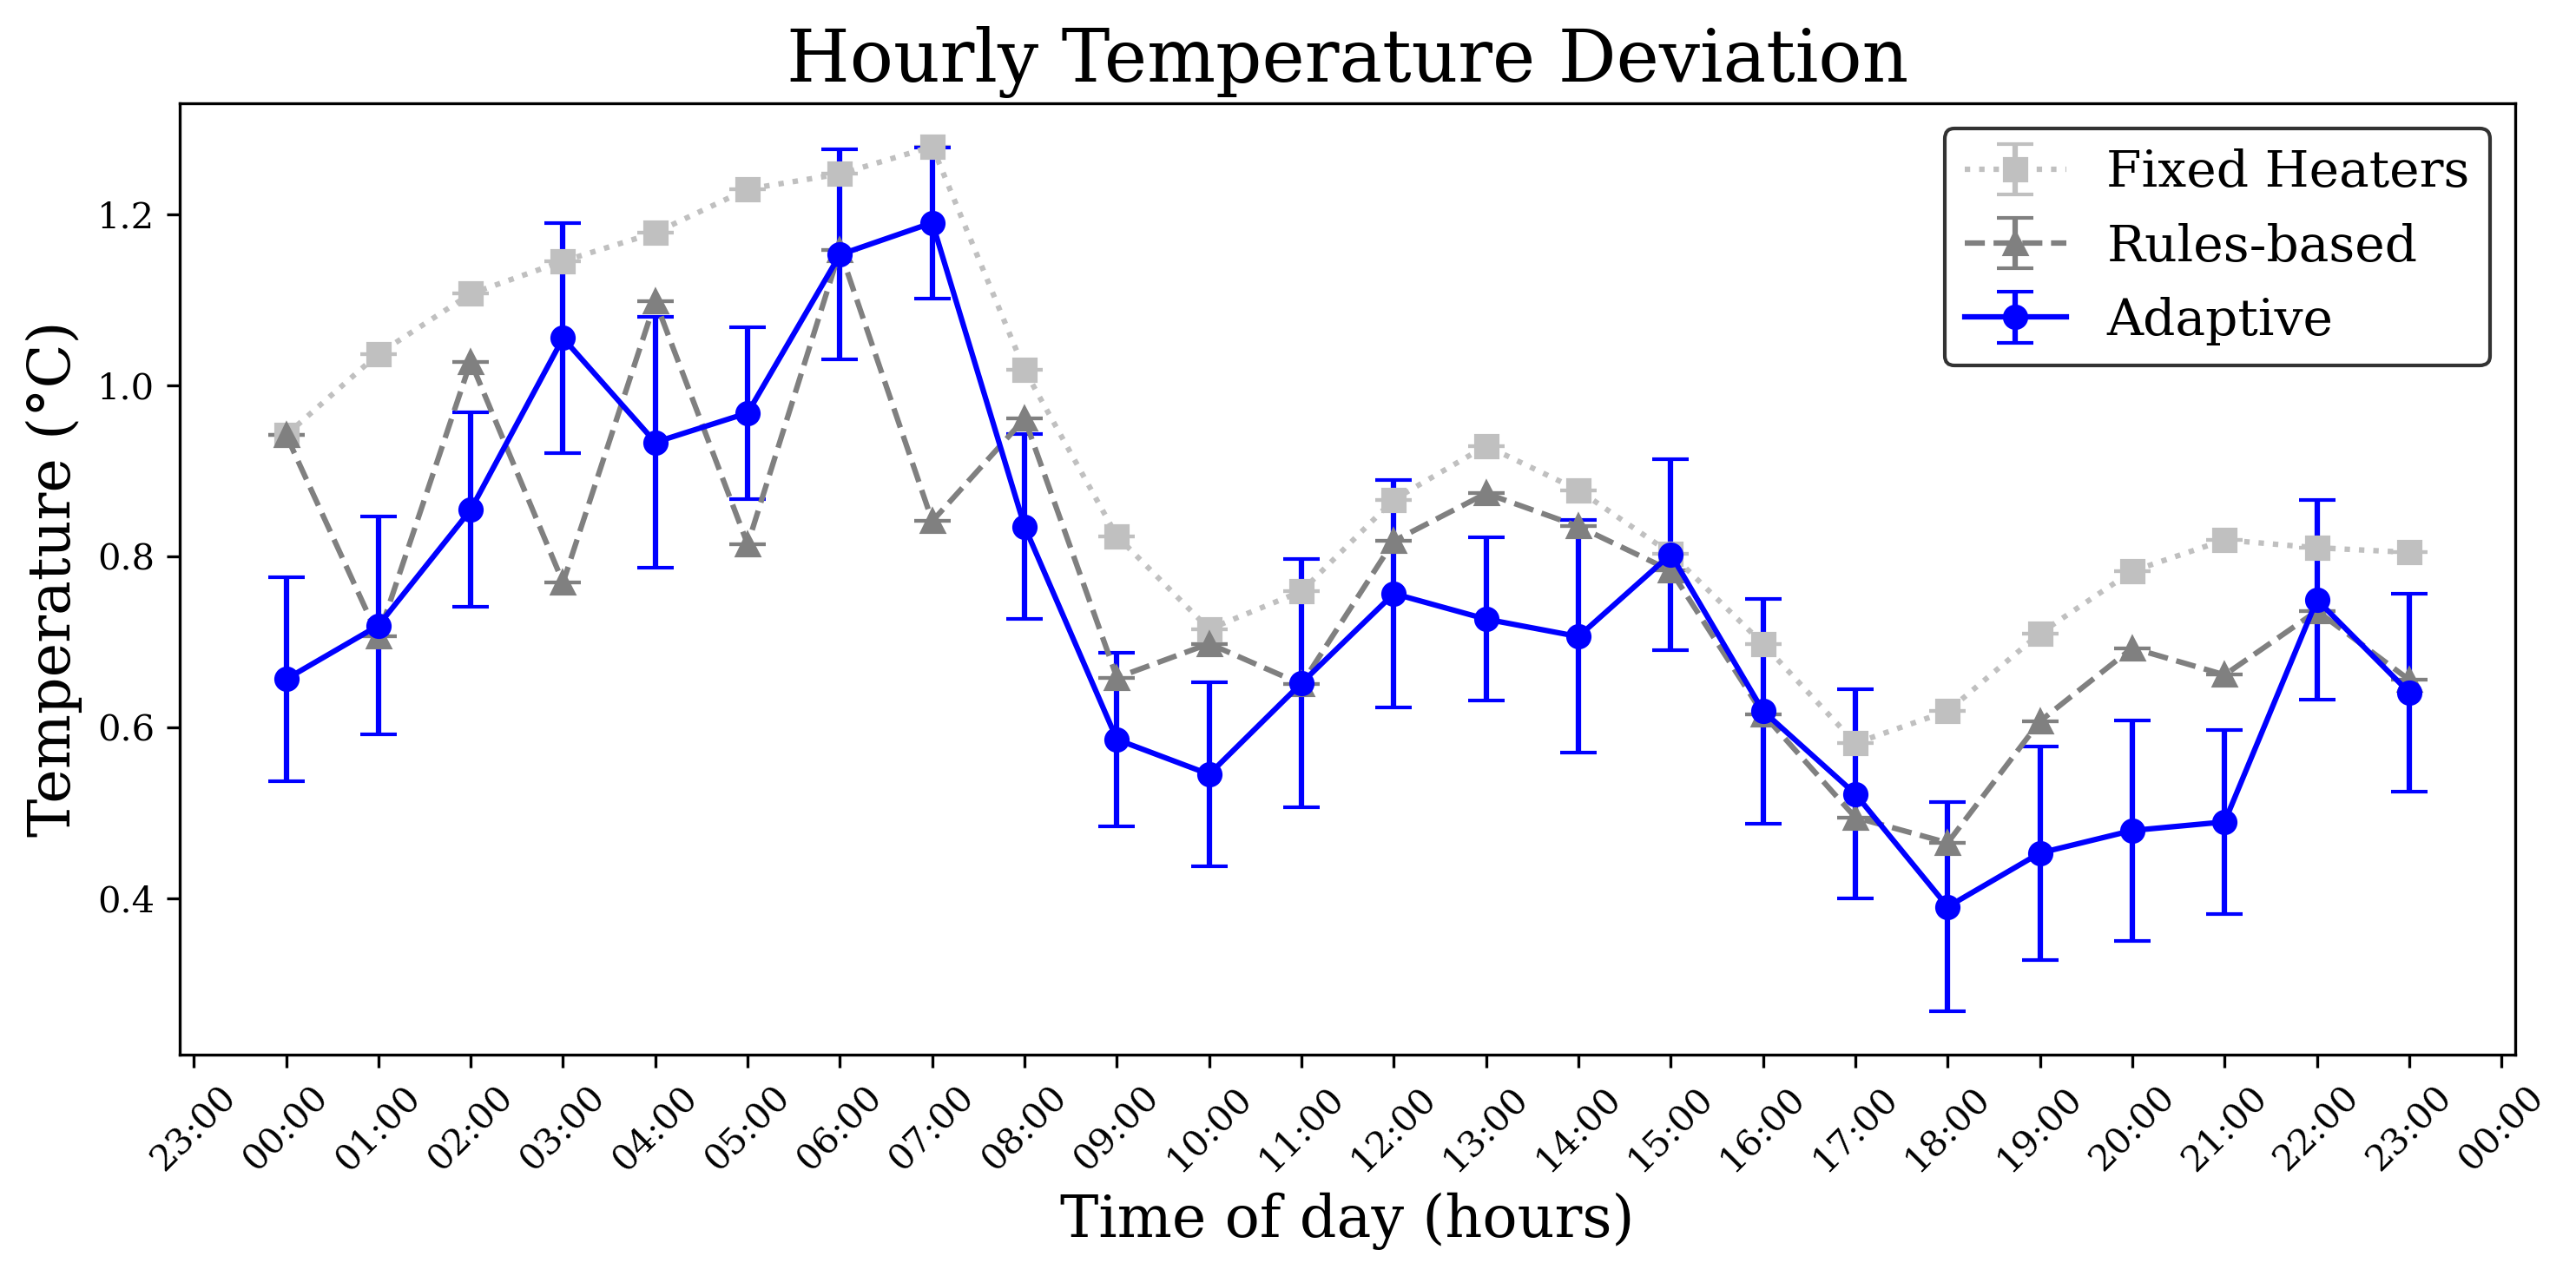

In [10]:
# Select and process relevant columns
std_temp_cols = [f"hourly_std_temp_{i}" for i in range(1, 11)]

# Compute the average and standard deviation across the 10 columns for each row
df['avg_hourly_std_temp'] = df[std_temp_cols].mean(axis=1)
df['std_hourly_std_temp'] = df[std_temp_cols].std(axis=1)

# Set serif font style and explicitly disable LaTeX rendering
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Define plotting styles for each type
style_map = {
    "Fixed Heaters": ("s", "silver", ":"),
    "Rules-based": ("^", "grey", "--"),
    "Adaptive": ("o", "blue", "-")
}

# Create the plot with error bars
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Loop through each unique type in the data
for t in df["type"].unique():
    df_subset = df[df["type"] == t]
    marker, color, linestyle = style_map.get(t, ("+", "black", "-"))
    
    # Plot the average hourly standard temperature with error bars representing the standard deviation
    ax.errorbar(
        df_subset["datetime"], 
        df_subset["avg_hourly_std_temp"], 
        yerr=df_subset["std_hourly_std_temp"],
        marker=marker, 
        linestyle=linestyle, 
        color=color, 
        label=t,
        capsize=5  # adds caps to the error bars for better visibility
    )

# Format the x-axis to display time in "Hour:Minute" format with ticks every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)

# Set axis labels, title, and legend
ax.set_xlabel("Time of day (hours)", fontsize=16)
ax.set_ylabel("Temperature (°C)", fontsize=16)
ax.tick_params(axis='both', labelsize=10)
# ax.set_title("Hourly Temperature Deviation", fontsize=20, fontweight='bold')
ax.set_title("Hourly Temperature Deviation", fontsize=20)
ax.legend(fontsize=14, edgecolor='black')

plt.tight_layout()
plt.show()

## Average Temperature

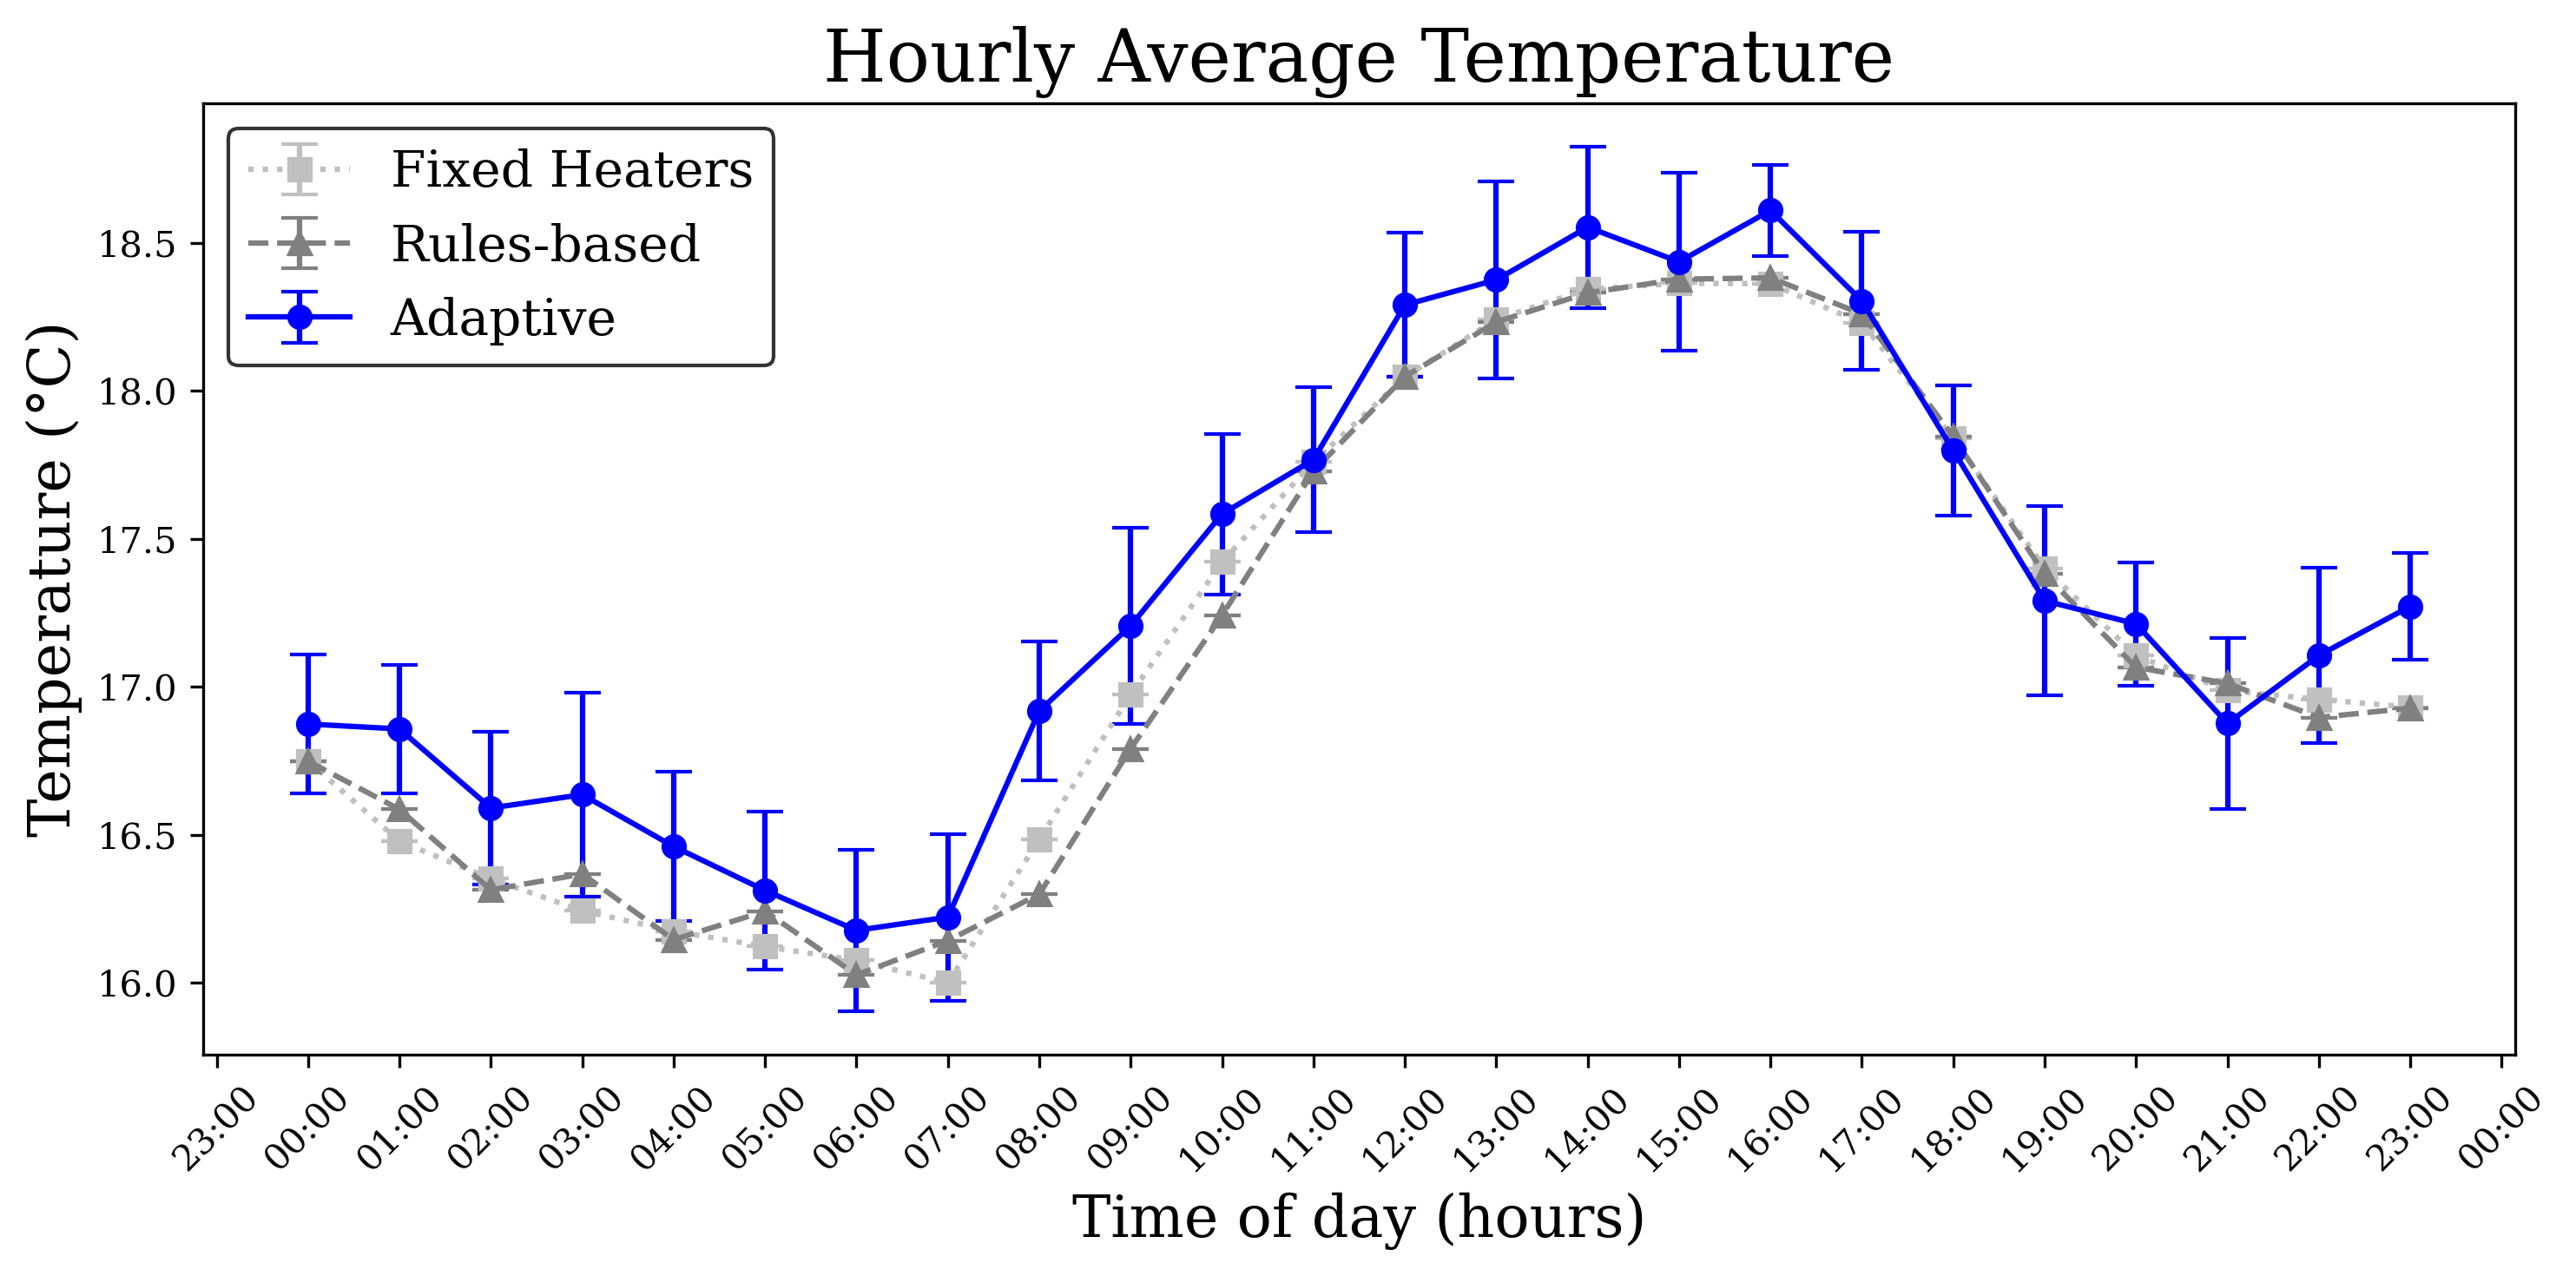

In [11]:
# Select and process relevant columns
avg_temp_cols = [f"hourly_avg_temp_{i}" for i in range(1, 11)]

# Compute the average and standard deviation across the 10 columns for each row
df['avg_hourly_avg_temp'] = df[avg_temp_cols].mean(axis=1)
df['std_hourly_avg_temp'] = df[avg_temp_cols].std(axis=1)

# Set serif font style and explicitly disable LaTeX rendering
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Define plotting styles for each type
style_map = {
    "Fixed Heaters": ("s", "silver", ":"),
    "Rules-based": ("^", "grey", "--"),
    "Adaptive": ("o", "blue", "-")
}

# Create the plot with error bars
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Loop through each unique type in the data
for t in df["type"].unique():
    df_subset = df[df["type"] == t]
    marker, color, linestyle = style_map.get(t, ("+", "black", "-"))
    
    # Plot the average hourly standard temperature with error bars representing the standard deviation
    ax.errorbar(
        df_subset["datetime"], 
        df_subset["avg_hourly_avg_temp"], 
        yerr=df_subset["std_hourly_avg_temp"],
        marker=marker, 
        linestyle=linestyle, 
        color=color, 
        label=t,
        capsize=5  # adds caps to the error bars for better visibility
    )

# Format the x-axis to display time in "Hour:Minute" format with ticks every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)

# Set axis labels, title, and legend
ax.set_xlabel("Time of day (hours)", fontsize=16)
ax.set_ylabel("Temperature (°C)", fontsize=16)
ax.tick_params(axis='both', labelsize=10)
# ax.set_title("Hourly Average Temperature", fontsize=20, fontweight='bold')
ax.set_title("Hourly Average Temperature", fontsize=20)
ax.legend(fontsize=14, edgecolor='black', loc='upper left')

plt.tight_layout()
plt.show()

## Energy Consumption

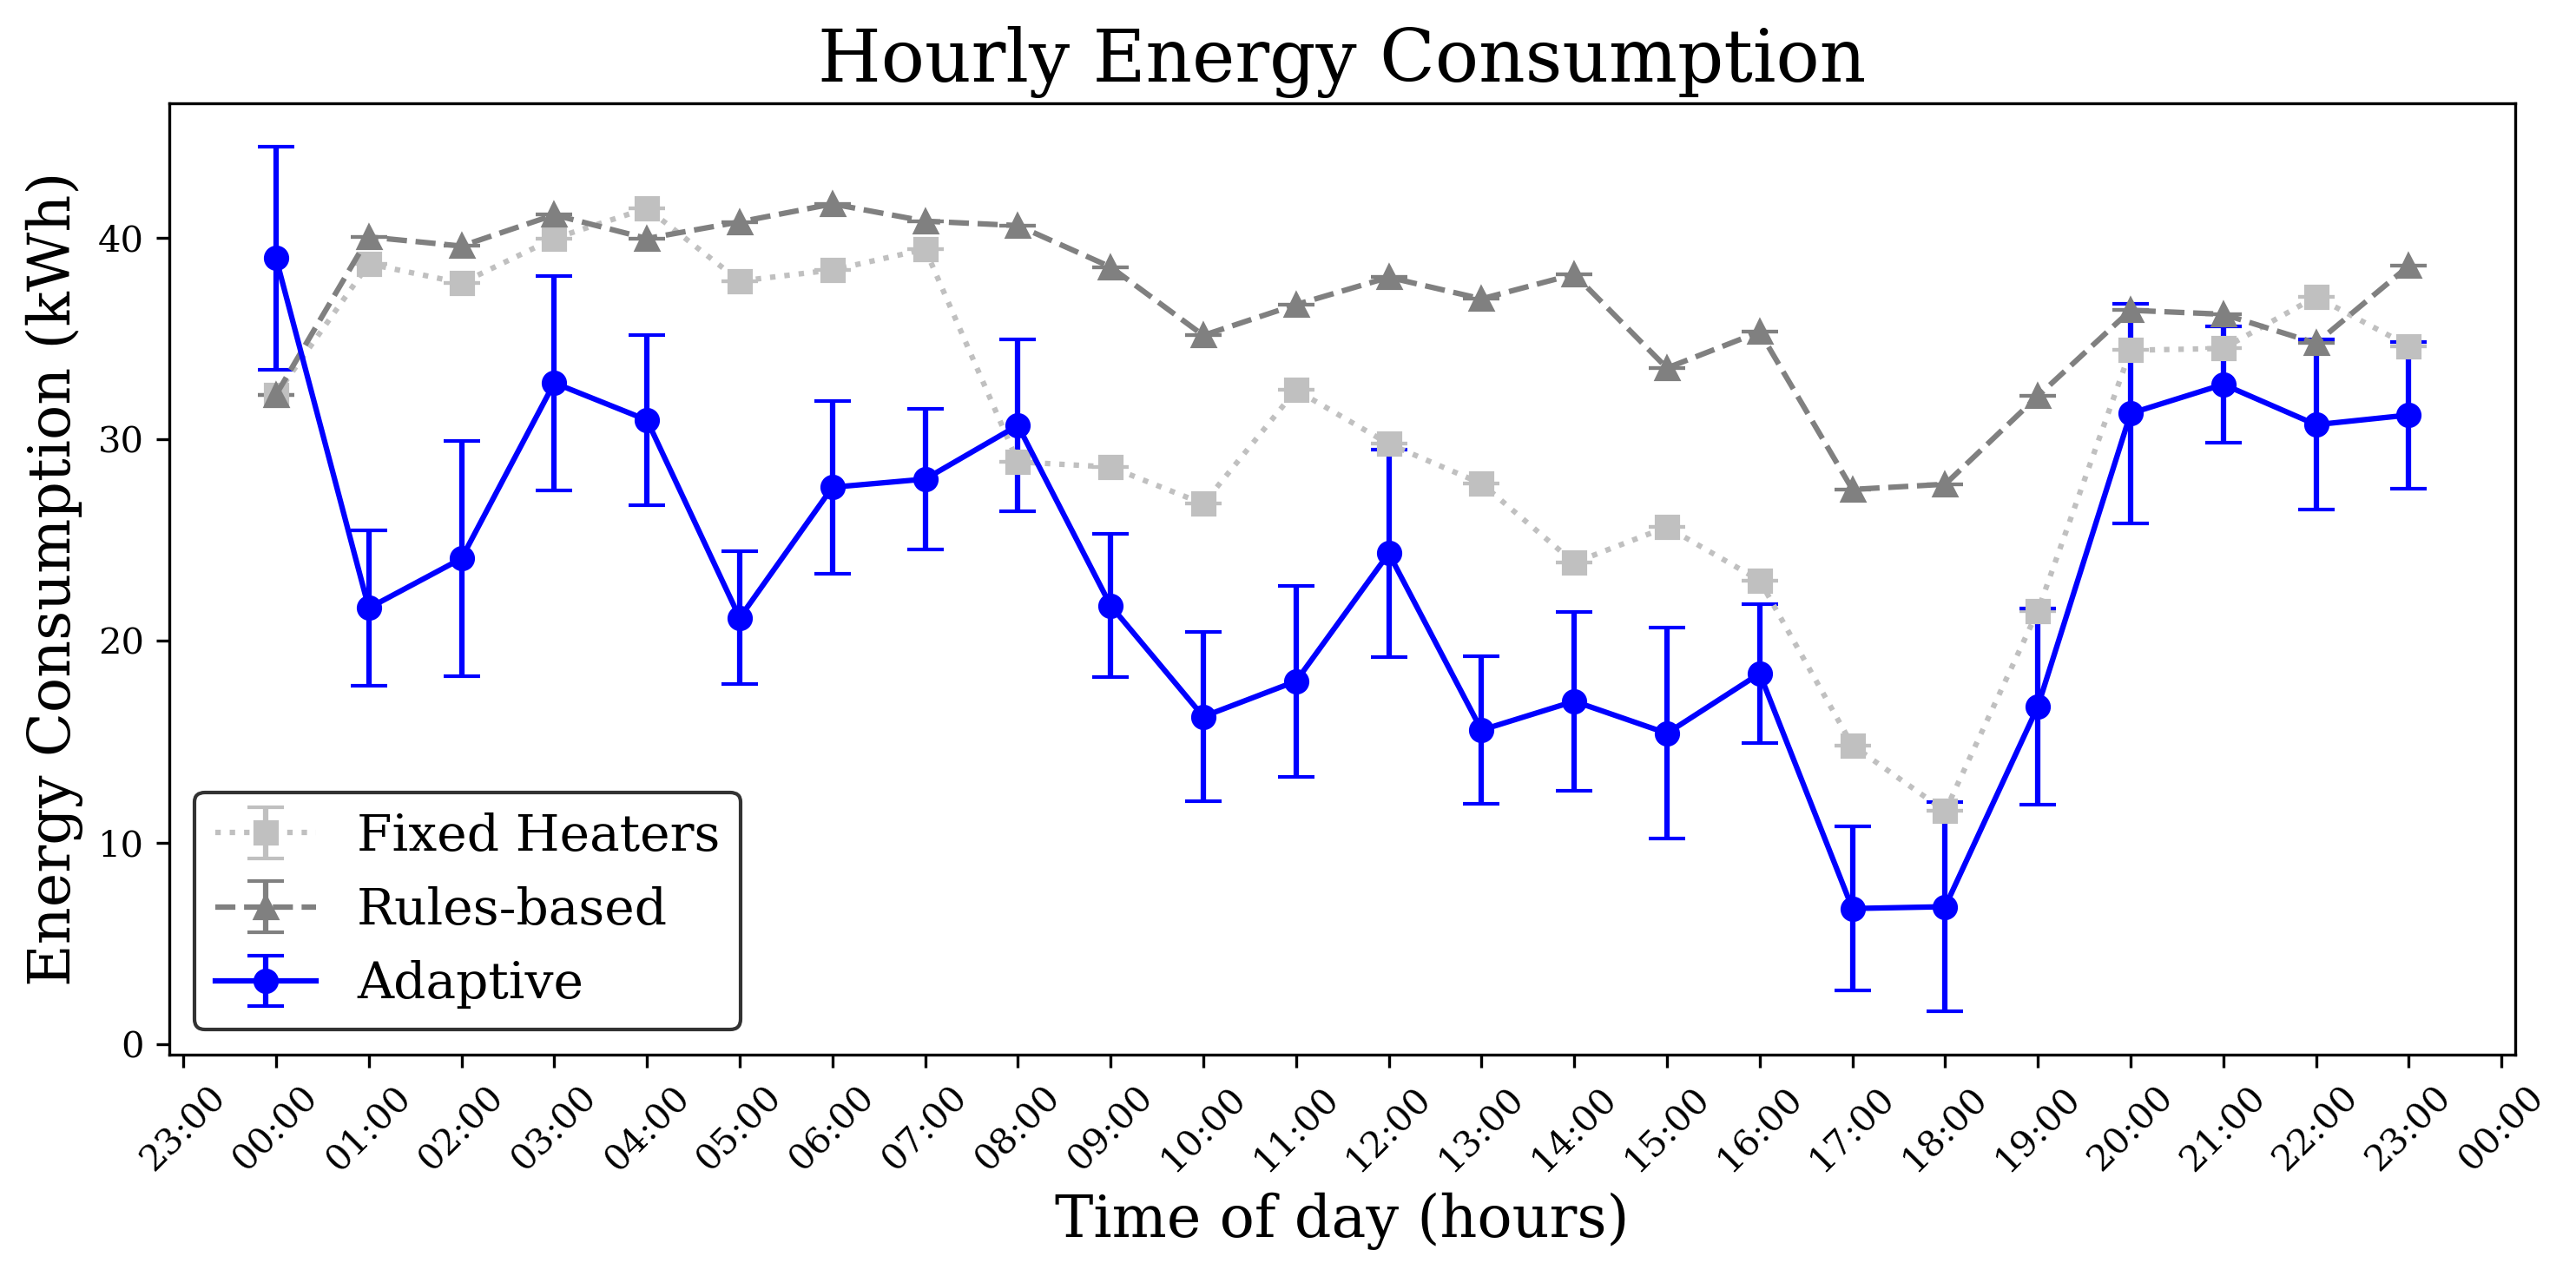

In [12]:
# Select and process relevant columns
elec_cols = [f"total_elec_{i}" for i in range(1, 11)]

# Compute the average and standard deviation across the 10 columns for each row
df['avg_hourly_total_elec'] = df[elec_cols].mean(axis=1)
df['std_hourly_total_elec'] = df[elec_cols].std(axis=1)

# Set serif font style and explicitly disable LaTeX rendering
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ['Computer Modern Sans Serif']
})

# Define plotting styles for each type
style_map = {
    "Fixed Heaters": ("s", "silver", ":"),
    "Rules-based": ("^", "grey", "--"),
    "Adaptive": ("o", "blue", "-")
}

# Create the plot with error bars
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Loop through each unique type in the data
for t in df["type"].unique():
    df_subset = df[df["type"] == t]
    marker, color, linestyle = style_map.get(t, ("+", "black", "-"))
    
    # Plot the average hourly standard temperature with error bars representing the standard deviation
    ax.errorbar(
        df_subset["datetime"], 
        df_subset["avg_hourly_total_elec"], 
        yerr=df_subset["std_hourly_total_elec"],
        marker=marker, 
        linestyle=linestyle, 
        color=color, 
        label=t,
        capsize=5  # adds caps to the error bars for better visibility
    )

# Format the x-axis to display time in "Hour:Minute" format with ticks every hour
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45)

# Set axis labels, title, and legend
ax.set_xlabel("Time of day (hours)", fontsize=16)
ax.set_ylabel("Energy Consumption (kWh)", fontsize=16)
ax.tick_params(axis='both', labelsize=10)
# ax.set_title("Hourly Energy Consumption", fontsize=20, fontweight='bold')
ax.set_title("Hourly Energy Consumption", fontsize=20)
ax.legend(fontsize=14, edgecolor='black')

plt.tight_layout()
plt.show()

# Difference number of heaters

In [13]:
# Load data from Excel
diff_num_heater_df = pd.read_excel('datasets/diff_number_heater.xlsx')

diff_num_heater_df.info()
diff_num_heater_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        9 non-null      object 
 1   num_heater  9 non-null      object 
 2   std_1       9 non-null      float64
 3   std_2       9 non-null      float64
 4   std_3       9 non-null      float64
 5   std_4       9 non-null      float64
 6   std_5       9 non-null      float64
 7   std_6       9 non-null      float64
 8   std_7       9 non-null      float64
 9   std_8       9 non-null      float64
 10  std_9       9 non-null      float64
 11  std_10      9 non-null      float64
 12  avg_1       9 non-null      float64
 13  avg_2       9 non-null      float64
 14  avg_3       9 non-null      float64
 15  avg_4       9 non-null      float64
 16  avg_5       9 non-null      float64
 17  avg_6       9 non-null      float64
 18  avg_7       9 non-null      float64
 19  avg_8       9 non-null      float

type num_heater  std_1  std_2  std_3  std_4  std_5  std_6  std_7  \
0    Rules-based  4 heaters   0.77   0.77   0.77   0.77   0.77   0.77   0.77   
1    Rules-based  6 heaters   0.81   0.81   0.81   0.81   0.81   0.81   0.81   
2    Rules-based  8 heaters   0.84   0.84   0.84   0.84   0.84   0.84   0.84   
3  Fixed Heaters  4 heaters   0.91   0.91   0.91   0.91   0.91   0.91   0.91   
4  Fixed Heaters  6 heaters   0.98   0.98   0.98   0.98   0.98   0.98   0.98   

   std_8  ...   elec_1   elec_2   elec_3   elec_4   elec_5   elec_6   elec_7  \
0   0.77  ...   882.63   882.63   882.63   882.63   882.63   882.63   882.63   
1   0.81  ...  1297.07  1297.07  1297.07  1297.07  1297.07  1297.07  1297.07   
2   0.84  ...  1688.68  1688.68  1688.68  1688.68  1688.68  1688.68  1688.68   
3   0.91  ...   741.14   741.14   741.14   741.14   741.14   741.14   741.14   
4   0.98  ...  1038.99  1038.99  1038.99  1038.99  1038.99  1038.99  1038.99   

    elec_8   elec_9  elec_10  
0   882.63   882.63   882.63  
1  1297.07  1297.07  1297.07  
2  1688.68  1688.68  1688.68  
3   741.14   741.14   741.14  
4  1038.99  1038.99  1038.99  

[5 rows x 32 columns]

## Temperatrue Standard Deviation

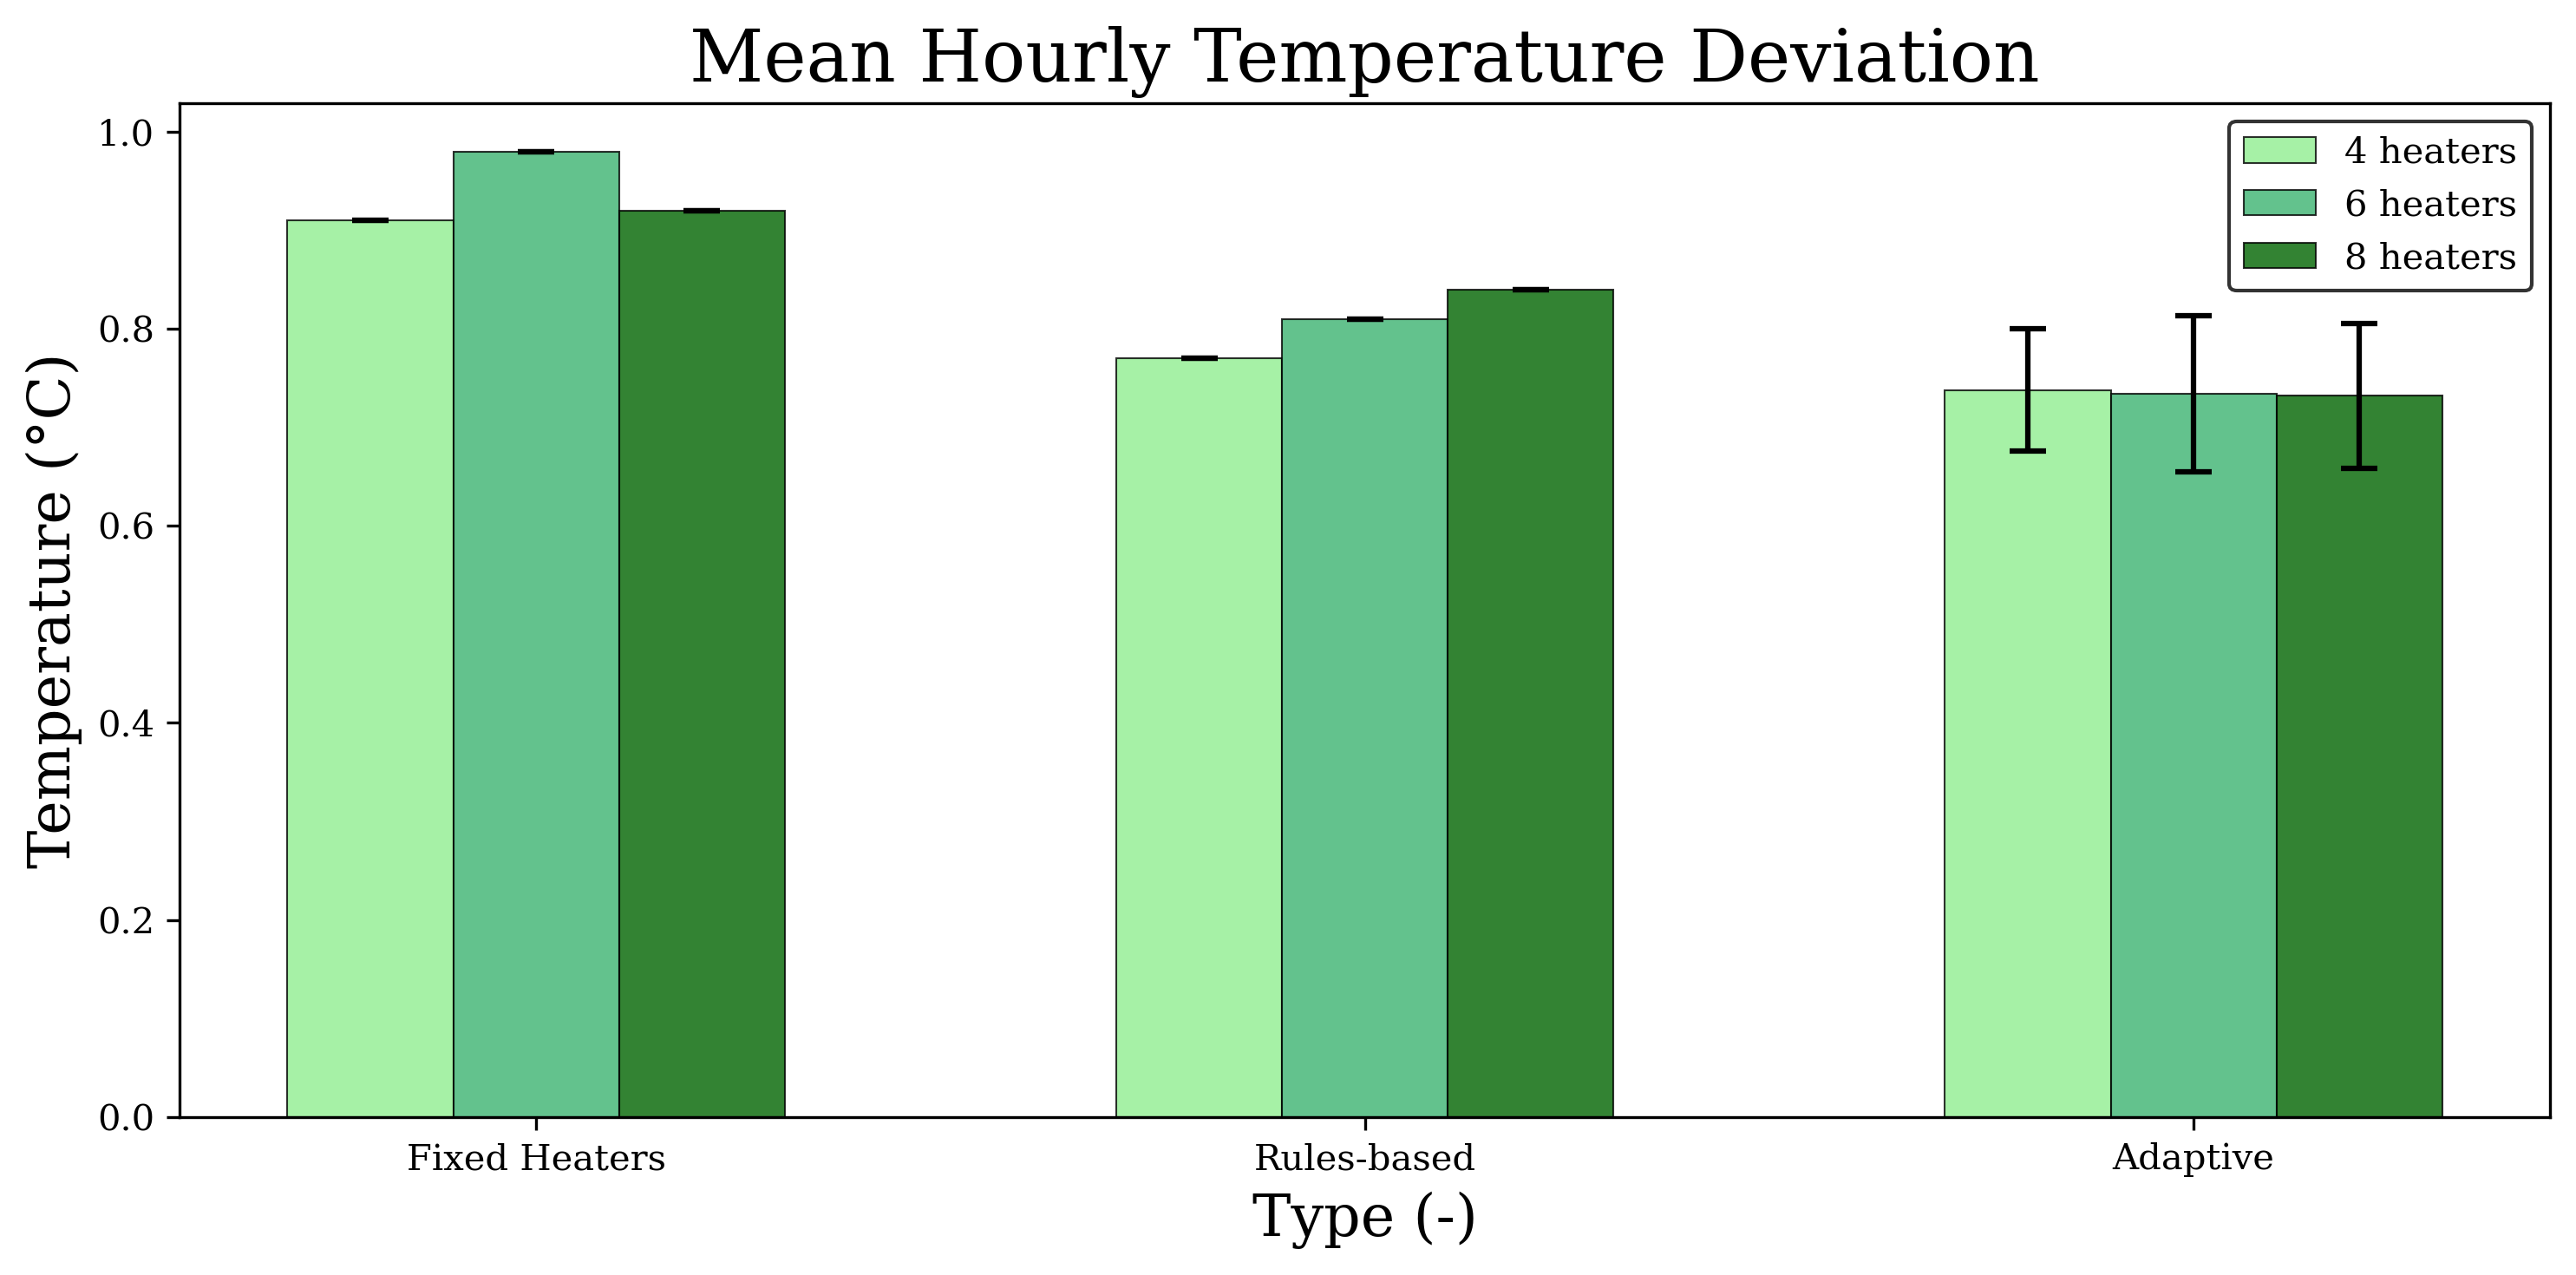

In [14]:
# Define the order for types and heater counts
type_order = ["Fixed Heaters", "Rules-based", "Adaptive"]
heater_order = ["4 heaters", "6 heaters", "8 heaters"]

# Reorder dataframe based on the defined order
diff_num_heater_df['type'] = pd.Categorical(diff_num_heater_df['type'], categories=type_order, ordered=True)
diff_num_heater_df['num_heater'] = pd.Categorical(diff_num_heater_df['num_heater'], categories=heater_order, ordered=True)
diff_num_heater_df = diff_num_heater_df.sort_values(by=['type', 'num_heater'])

# Compute mean and standard deviation for STD values
diff_num_heater_df['std_mean'] = diff_num_heater_df.iloc[:, 2:12].mean(axis=1)
diff_num_heater_df['std_error'] = diff_num_heater_df.iloc[:, 2:12].std(axis=1)

# Prepare data for plotting
x = np.arange(len(type_order))  # X-axis positions for bar groups

# Bar plot settings
bar_width = 0.2

# Define colors for different heater numbers
colors = ['lightgreen', 'mediumseagreen', 'darkgreen']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot bars with customized error bars
for i, heater in enumerate(heater_order):
    subset = diff_num_heater_df[diff_num_heater_df['num_heater'] == heater]
    means = subset['std_mean'].values
    errors = subset['std_error'].values
    ax.bar(x + i * bar_width, 
           means, 
           width=bar_width, 
           yerr=errors, 
           label=heater,
           color=colors[i], 
           capsize=5, 
           alpha=0.8, 
           edgecolor='black',
           linewidth=0.5,
           error_kw={'elinewidth': 1.5, 'capthick': 1.5, 'capsize': 5, 'markeredgewidth': 1.5})

# Format plot
x_offset = bar_width * (len(heater_order) - 1) / 2  # Calculate center offset
ax.set_xticks(x + x_offset)  # Center group labels
ax.set_xticklabels(type_order, fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Temperature (°C)', fontsize=16)
ax.set_xlabel('Type (-)', fontsize=16)
ax.set_title('Mean Hourly Temperature Deviation', fontsize=20)

# Adjust legend settings (remove title)
ax.legend(loc='upper right', fontsize=10, edgecolor='black')
# ax.legend(["4 heaters", "6 heaters", "8 heaters"], loc='upper right', fontsize=10, ncol=3, frameon=False)

# Remove grid from inside the chart
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

## Average Temperature

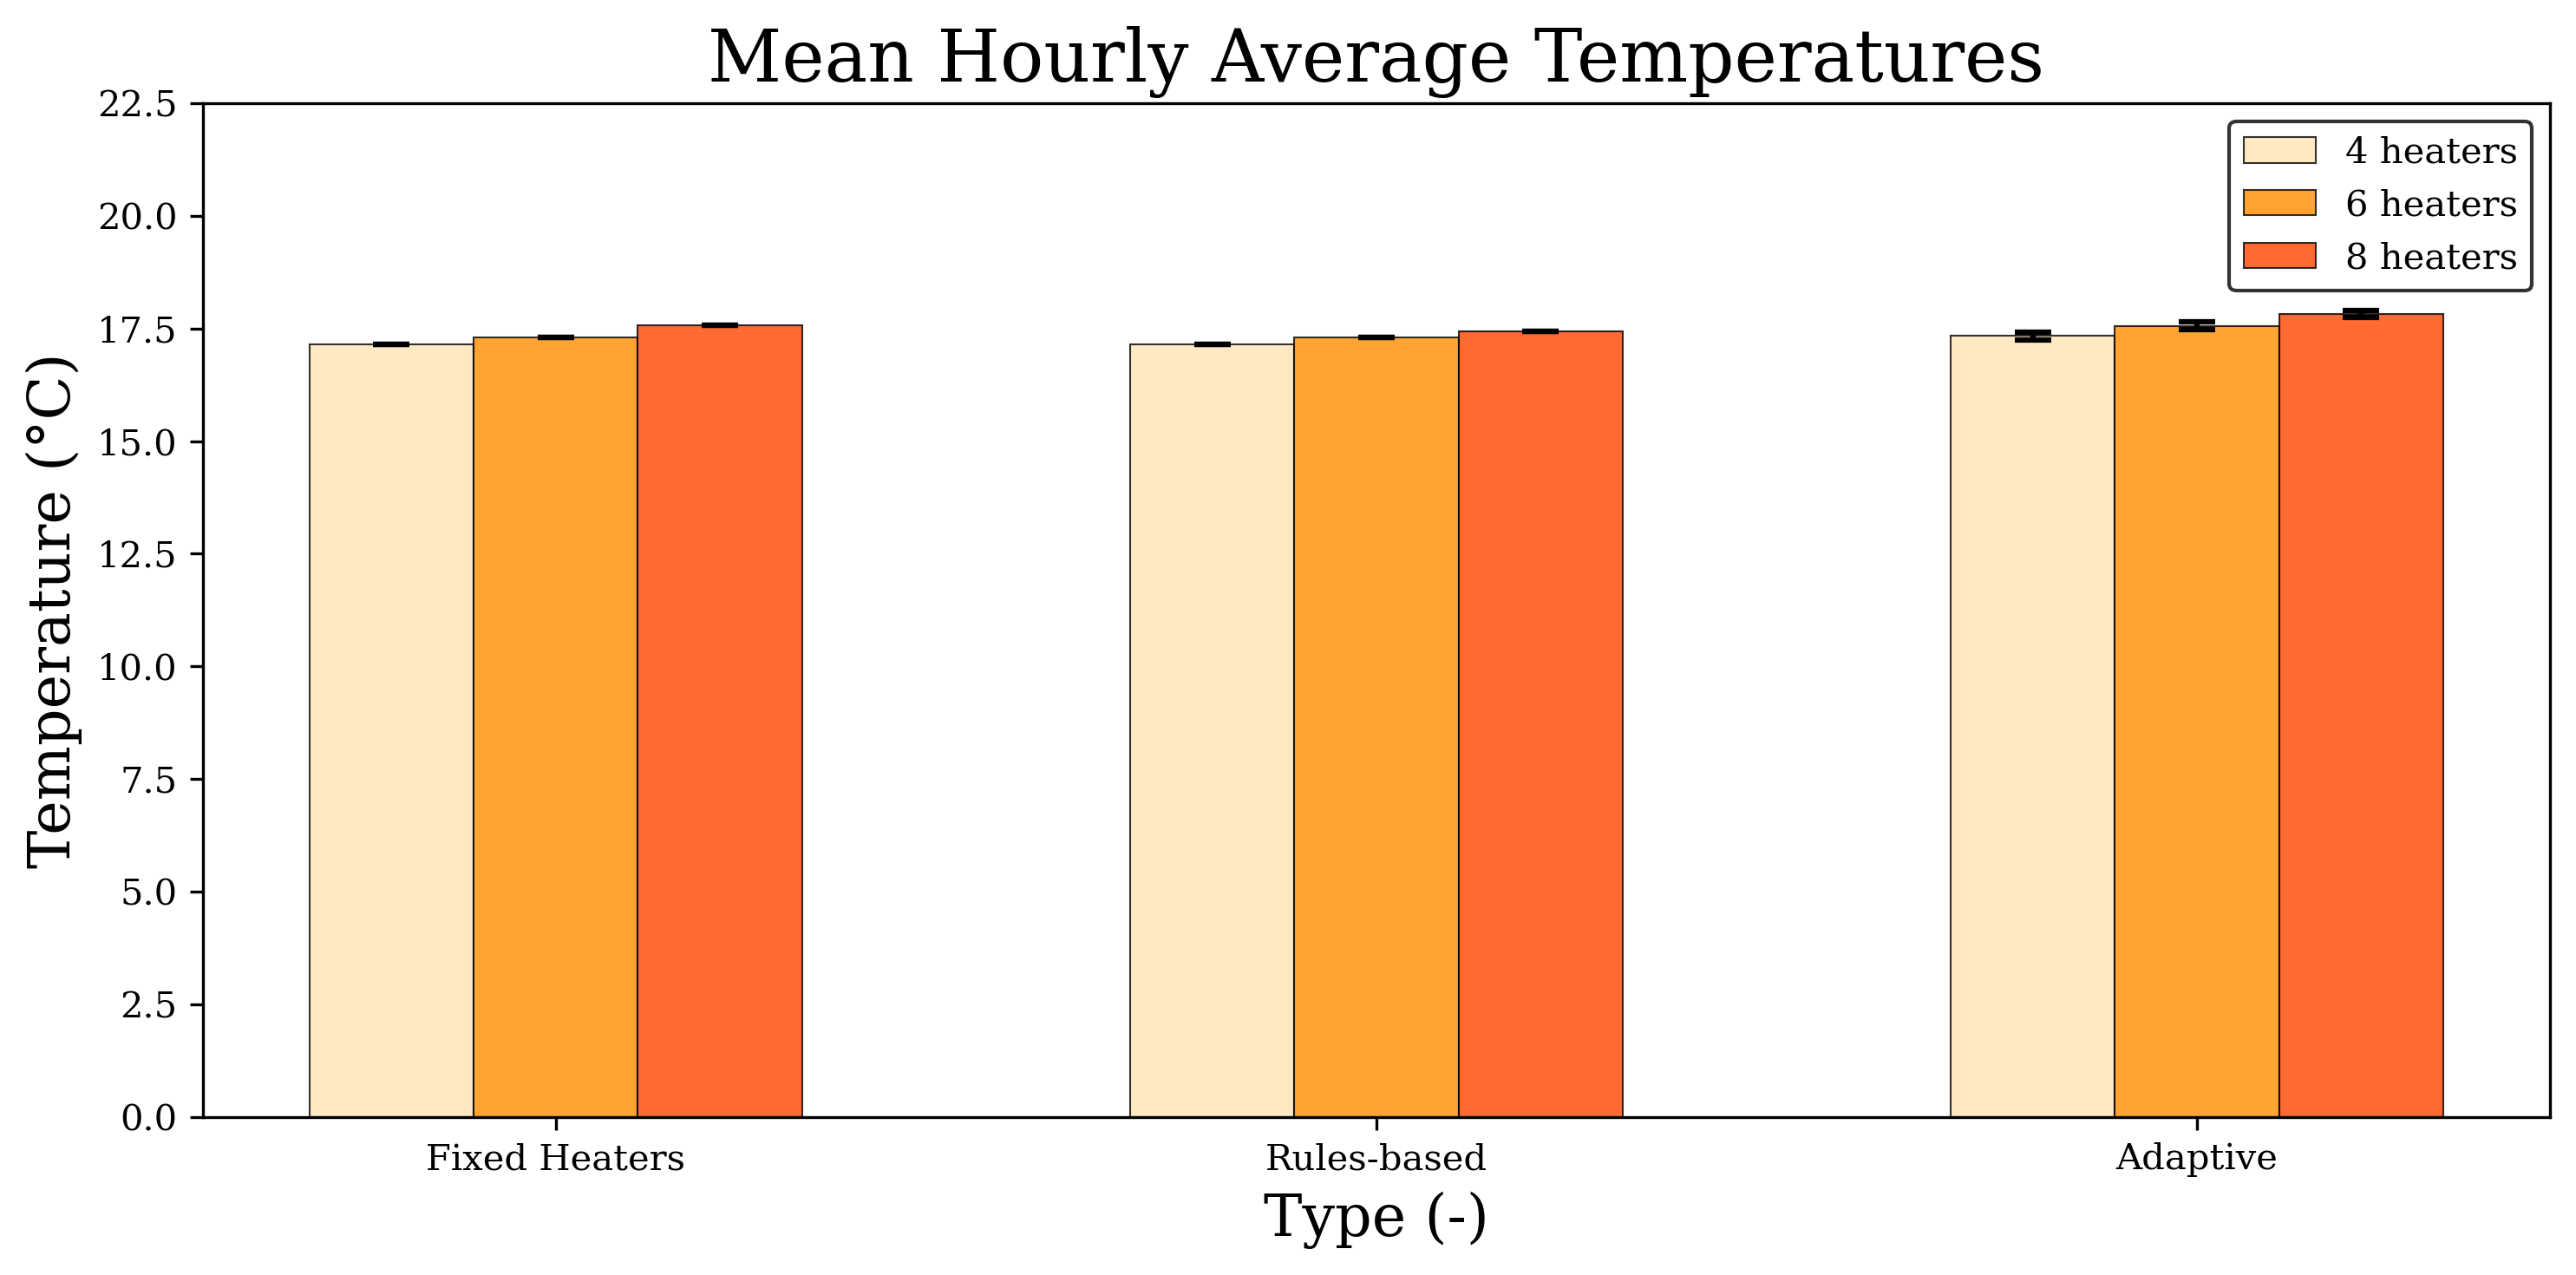

In [15]:
# Define custom colors
colors = ['moccasin', 'darkorange', 'orangered']

# Compute mean and standard deviation for AVG values
diff_num_heater_df['avg_mean'] = diff_num_heater_df.iloc[:, 12:22].mean(axis=1)
diff_num_heater_df['avg_error'] = diff_num_heater_df.iloc[:, 12:22].std(axis=1)

# Prepare data for plotting
x = np.arange(len(type_order))  # X-axis positions for bar groups

# Bar plot settings
bar_width = 0.2

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot bars with customized error bars and new colors
for i, heater in enumerate(heater_order):
    subset = diff_num_heater_df[diff_num_heater_df['num_heater'] == heater]
    means = subset['avg_mean'].values
    errors = subset['avg_error'].values
    
    ax.bar(x + i * bar_width, 
           means, 
           width=bar_width, 
           yerr=errors, 
           label=heater,
           color=colors[i], 
           capsize=5, 
           alpha=0.8, 
           edgecolor='black',
           linewidth=0.5,
           error_kw={'elinewidth': 1.5, 'capthick': 1.5, 'capsize': 5, 'markeredgewidth': 1.5})

# Format plot
ax.set_ylim(0, 22.5)
x_offset = bar_width * (len(heater_order) - 1) / 2  # Center x-ticks
ax.set_xticks(x + x_offset)
ax.set_xticklabels(type_order, fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Temperature (°C)', fontsize=16)
ax.set_xlabel('Type (-)', fontsize=16)
ax.set_title('Mean Hourly Average Temperatures', fontsize=20)

# Adjust legend settings (horizontal layout for better readability)
ax.legend(loc='upper right', fontsize=10, edgecolor='black')

# Remove grid
ax.grid(False)

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Energy Consumption

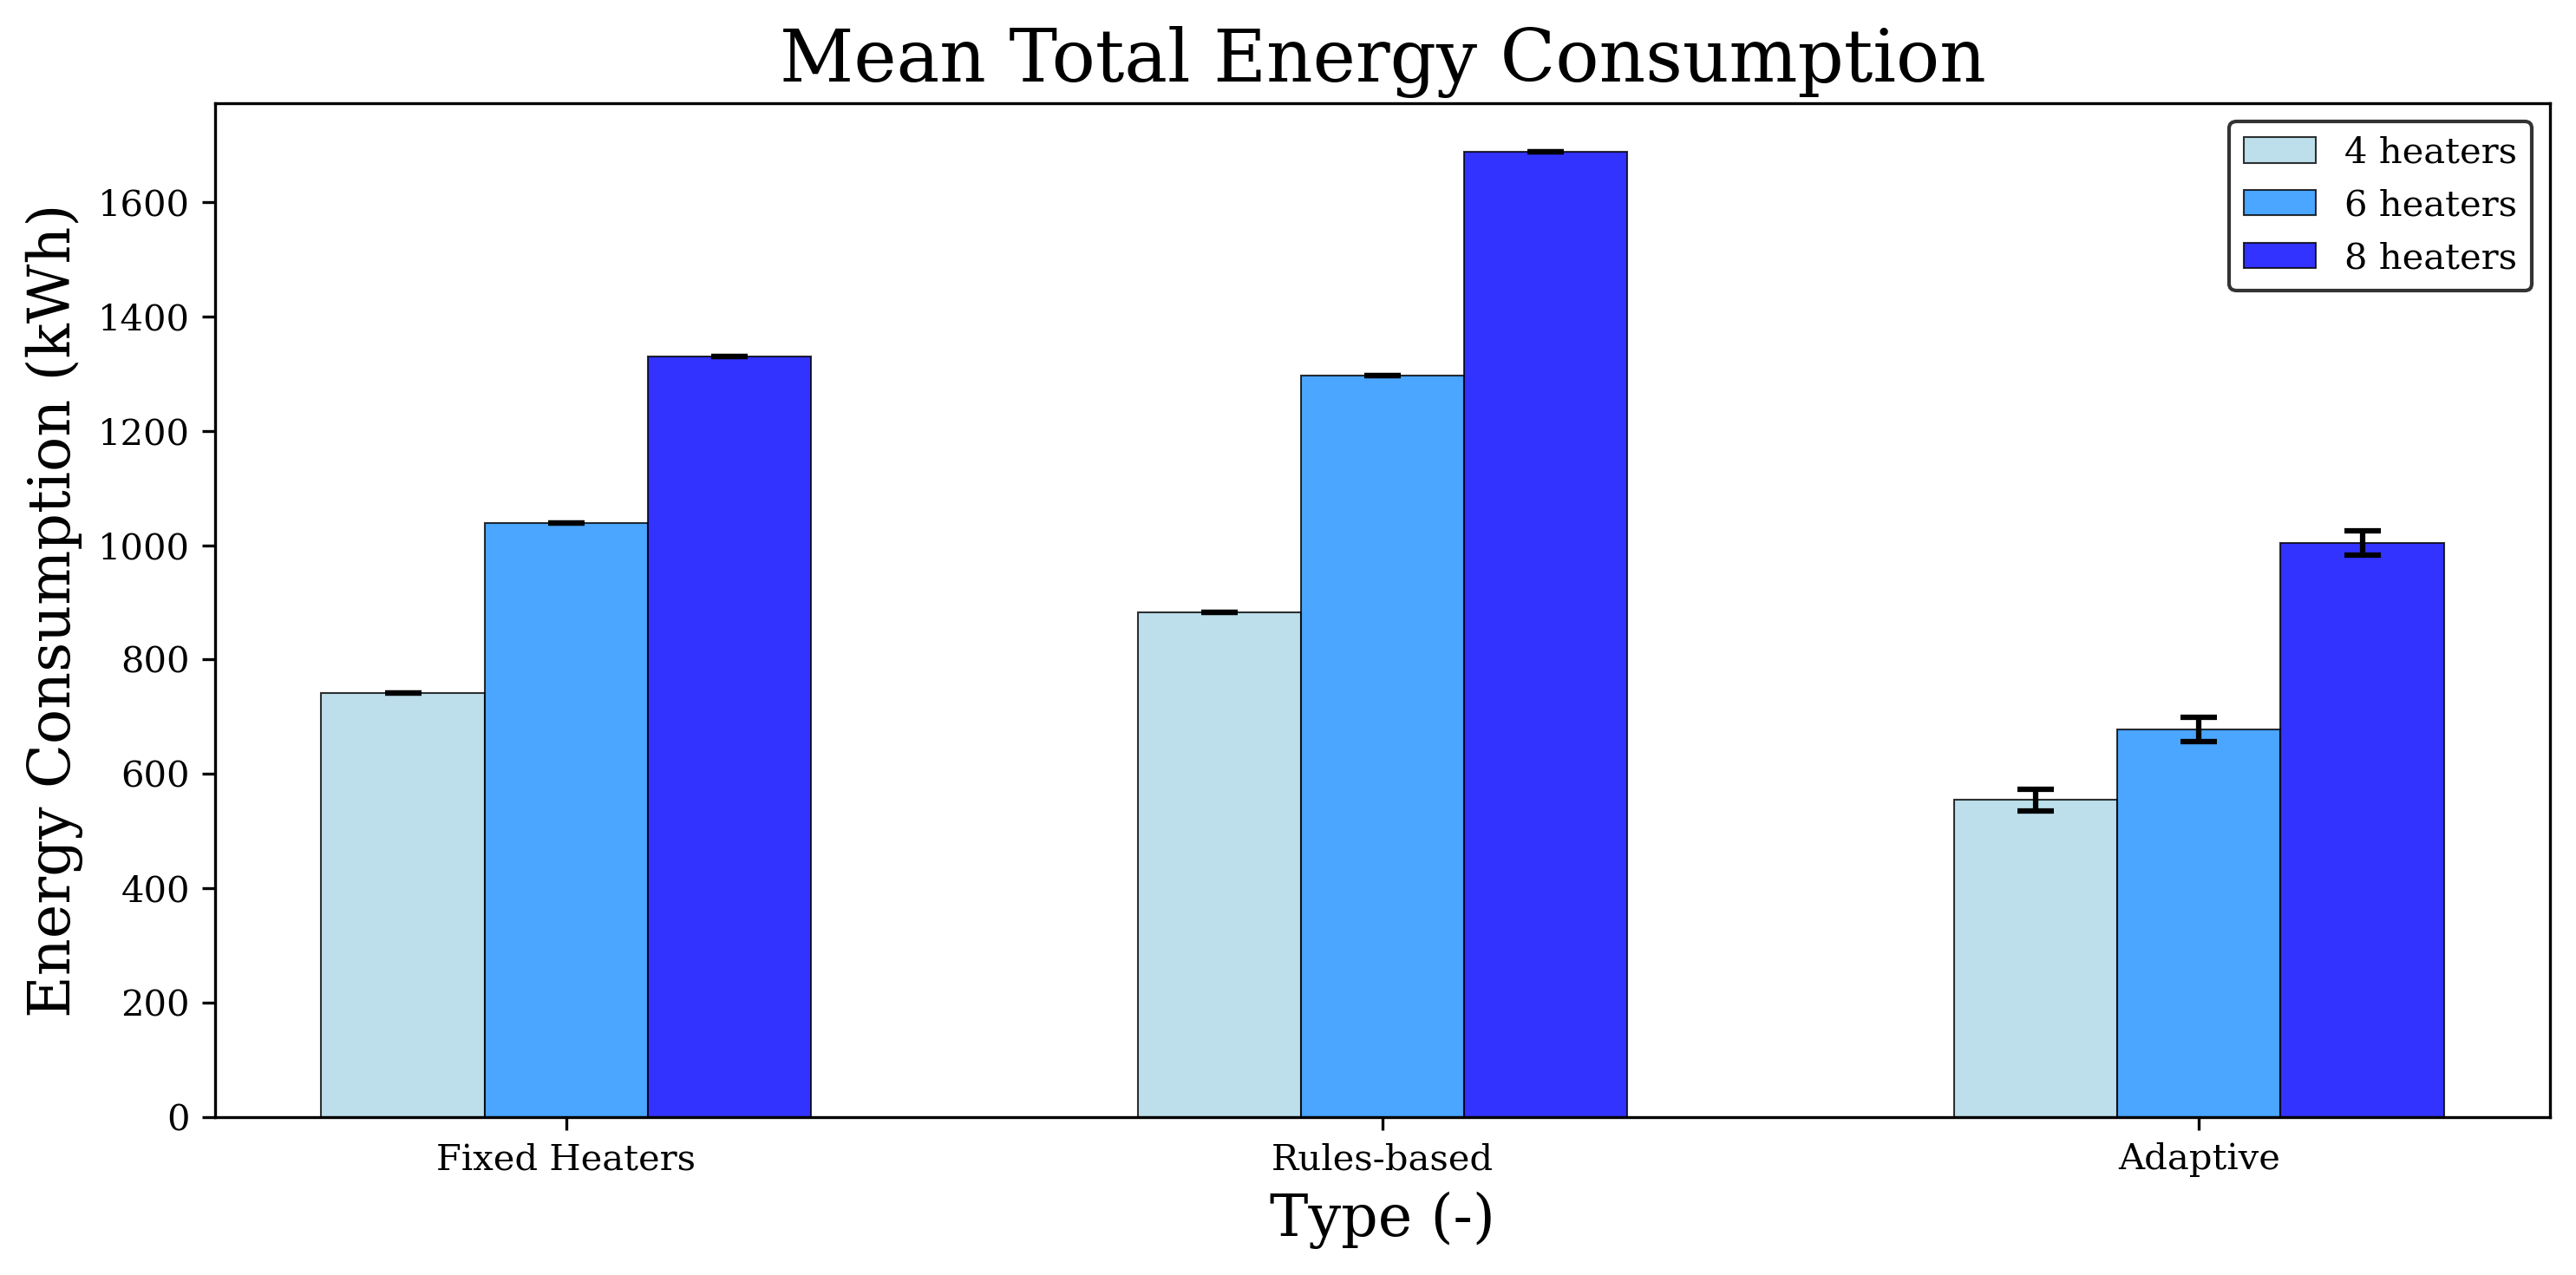

In [16]:
# Define custom colors
colors = ['lightblue', 'dodgerblue', 'blue']

# Compute mean and standard deviation for Energy Consumption (elec) values
diff_num_heater_df['elec_mean'] = diff_num_heater_df.iloc[:, 22:32].mean(axis=1)
diff_num_heater_df['elec_error'] = diff_num_heater_df.iloc[:, 22:32].std(axis=1)

# Prepare data for plotting
x = np.arange(len(type_order))  # X-axis positions for bar groups

# Bar plot settings
bar_width = 0.2

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Plot bars with customized error bars and new colors
for i, heater in enumerate(heater_order):
    subset = diff_num_heater_df[diff_num_heater_df['num_heater'] == heater]
    means = subset['elec_mean'].values
    errors = subset['elec_error'].values
    
    ax.bar(x + i * bar_width, 
           means, 
           width=bar_width, 
           yerr=errors, 
           label=heater,
           color=colors[i], 
           capsize=5, 
           alpha=0.8, 
           edgecolor='black',
           linewidth=0.5,
           error_kw={'elinewidth': 1.5, 'capthick': 1.5, 'capsize': 5, 'markeredgewidth': 1.5})

# Format plot
x_offset = bar_width * (len(heater_order) - 1) / 2  # Center x-ticks
ax.set_xticks(x + x_offset)
ax.set_xticklabels(type_order, fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Energy Consumption (kWh)', fontsize=16)
ax.set_xlabel('Type (-)', fontsize=16)
ax.set_title('Mean Total Energy Consumption', fontsize=20)

# Adjust legend settings (horizontal layout for better readability)
ax.legend(loc='upper right', fontsize=10, edgecolor='black')

# Remove grid
ax.grid(False)

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()